In [1]:
print('Hello world!')

Hello world!


# Python libs

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from cmath import rect, phase
from math import radians, degrees

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# Data import

In [3]:
# Set unlimited columns
pd.set_option('display.max_columns', None)

# Import CSV files to variables of type pandas.DataFrame
general_data = pd.read_csv('./csv/general_data.csv')
employee_survey_data = pd.read_csv('./csv/employee_survey_data.csv')
manager_survey_data = pd.read_csv('./csv/manager_survey_data.csv')
in_time = pd.read_csv('./csv/in_time.csv')
out_time = pd.read_csv('./csv/out_time.csv')

# Traitement de general_data

In [4]:
general_data.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  JobLevel  \
0          2  Life Sciences              1           1  Female         1   
1          1  Life Sciences              1           2  Female         1   
2          4          Other              1           3    Male         4   
3          5  Life Sciences              1           4    Male         3   
4          1        Medical              1           5    Male         1   

                     JobRole MaritalStatus  MonthlyIncome  NumCompaniesWorked  \
0  Healthcare Representative       Married         131160                 1.0   
1         Research Scientist        Single          41890                 0.0   
2            Sales Executive       Married         193280                 1.0   
3            Human Resources       Married          83210                 3.0   
4            Sales Executive        Single          23420                 4.0   

  Over18  PercentSalaryHike  StandardHours  StockOptionLevel  \
0      Y                 11              8                 0   
1      Y                 23              8                 1   
2      Y                 15              8                 3   
3      Y                 11              8                 3   
4      Y                 12              8                 2   

   TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                1.0                      6               1   
1                6.0                      3               5   
2                5.0                      2               5   
3               13.0                      5               8   
4                9.0                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     0  
1                        1                     4  
2                        0                     3  
3                        7                     5  
4                        0                     4

On va vérifier la répartition des valeurs dans notre dataset general_data sur certaines colonnes. Si tous les employés ont la même valeur pour une même colonne alors cette colonne est inutile : autant l'éliminer.

Pour cela on utilisera la fonction value_counts : dans l'exemple ci-dessous on voit les différents âges et combien d'employés par valeur d'âge

In [5]:
 general_data["Age"].value_counts()

35    234
34    231
36    207
31    207
29    204
32    183
30    180
38    174
33    174
40    171
37    150
28    144
27    144
42    138
39    126
45    123
41    120
26    117
46     99
44     99
43     96
50     90
24     78
25     78
47     72
49     72
55     66
53     57
51     57
48     57
54     54
52     54
22     48
23     42
58     42
56     42
21     39
20     33
59     30
19     27
18     24
60     15
57     12
Name: Age, dtype: int64

Dans l'extrait du DataFrame plus haut, on repère seulement 3 colonnes qui ont la même valeur pour les 5 employés de l'extrait, on vérifie si cela se généralise dans tout le DataFrame ou si c'était un hasard avec les 5 premiers.

In [6]:
print(general_data["EmployeeCount"].value_counts())
print(general_data["Over18"].value_counts())
print(general_data["StandardHours"].value_counts())

1    4410
Name: EmployeeCount, dtype: int64
Y    4410
Name: Over18, dtype: int64
8    4410
Name: StandardHours, dtype: int64


Les colonnes EmployeeCount, Over18 et StandardHours sont les mêmes pour tous les employés, elles sont donc à éliminer.

In [7]:
general_data.drop(columns=['EmployeeCount', 'Over18','StandardHours'], inplace=True)
general_data.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeID  Gender  JobLevel  \
0          2  Life Sciences           1  Female         1   
1          1  Life Sciences           2  Female         1   
2          4          Other           3    Male         4   
3          5  Life Sciences           4    Male         3   
4          1        Medical           5    Male         1   

                     JobRole MaritalStatus  MonthlyIncome  NumCompaniesWorked  \
0  Healthcare Representative       Married         131160                 1.0   
1         Research Scientist        Single          41890                 0.0   
2            Sales Executive       Married         193280                 1.0   
3            Human Resources       Married          83210                 3.0   
4            Sales Executive        Single          23420                 4.0   

   PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
0                 11                 0                1.0   
1                 23                 1                6.0   
2                 15                 3                5.0   
3                 11                 3               13.0   
4                 12                 2                9.0   

   TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0                      6               1                        0   
1                      3               5                        1   
2                      2               5                        0   
3                      5               8                        7   
4                      2               6                        0   

   YearsWithCurrManager  
0                     0  
1                     4  
2                     3  
3                     5  
4                     4

On va transformer certaiens données présentes en  format numérique sous formes de caractères litteraux pour plus de compréhension. Ici Education peut être interessant à changer.

In [8]:
general_data["Education"] = general_data['Education'].replace({ 1 : 'Below College', 2: 'College',3: 'Bachelor',4: 'Master',5 : 'Doctor'})

On remarque que certaines colonnes : "NumCompaniesWorked" et "TotalWorkingYears" sont parfois non renseignées, on laisse les valeurs vides pour le moment mais il faudra peut-être les gérer si le besoin se présente.

# Traitement des questionnaires (employee_survey_data  et manager_survey_data)

In [9]:
employee_survey_data.head()

EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
0           1                      3.0              4.0              2.0
1           2                      3.0              2.0              4.0
2           3                      2.0              2.0              1.0
3           4                      4.0              4.0              3.0
4           5                      4.0              1.0              3.0

 On va de la même façon que le premier fichier modifier nos colonnes numériques importantes en litteraux.

In [10]:
employee_survey_data['WorkLifeBalance'] = employee_survey_data['WorkLifeBalance'].replace({ 1 : 'Low', 2: 'Medium',3: 'High',4: 'Very High'})
employee_survey_data['EnvironmentSatisfaction'] = employee_survey_data['EnvironmentSatisfaction'].replace({ 1 : 'Low', 2: 'Medium',3: 'High',4: 'Very High'})
employee_survey_data['JobSatisfaction'] = employee_survey_data['JobSatisfaction'].replace({ 1 : 'Low', 2: 'Medium',3: 'High',4: 'Very High'})

employee_survey_data.head()

EmployeeID EnvironmentSatisfaction JobSatisfaction WorkLifeBalance
0           1                    High       Very High          Medium
1           2                    High          Medium       Very High
2           3                  Medium          Medium             Low
3           4               Very High       Very High            High
4           5               Very High             Low            High

Pour le fichier des questionnaires managers, on fait pareil pour la note de l'implication et de la qualité de travail au cours de l'année

In [11]:
manager_survey_data.head()

EmployeeID  JobInvolvement  PerformanceRating
0           1               3                  3
1           2               2                  4
2           3               3                  3
3           4               2                  3
4           5               3                  3

In [12]:
manager_survey_data['JobInvolvement'] = manager_survey_data['JobInvolvement'].replace({ 1 : 'Low', 2: 'Medium',3: 'High',4: 'Very High'})
manager_survey_data['PerformanceRating'] = manager_survey_data['PerformanceRating'].replace({ 1 : 'Low', 2: 'Medium',3: 'High',4: 'Very High'})

manager_survey_data.head()

EmployeeID JobInvolvement PerformanceRating
0           1           High              High
1           2         Medium         Very High
2           3           High              High
3           4         Medium              High
4           5           High              High

Dans le questionnaires employés, ceux ci ne sont pas obligés de répondre, il faudra donc traiter les valeurs non renseignées pour notre apprentissage.

# Traitement des données sur les horaires de travail.

On va traiter deux fichiers : les horaires d'éntrées et de sorties pour chaque employé et pour chaque jour de l'anée.

In [13]:
# Reset in_time / out_time :
#in_time = pd.read_csv('../csv/in_time.csv')
#out_time = pd.read_csv('../csv/out_time.csv')

in_time.head()

Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0           1         NaN  2015-01-02 09:43:45  2015-01-05 10:08:48   
1           2         NaN  2015-01-02 10:15:44  2015-01-05 10:21:05   
2           3         NaN  2015-01-02 10:17:41  2015-01-05 09:50:50   
3           4         NaN  2015-01-02 10:05:06  2015-01-05 09:56:32   
4           5         NaN  2015-01-02 10:28:17  2015-01-05 09:49:58   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 09:54:26  2015-01-07 09:34:31  2015-01-08 09:51:09   
1                  NaN  2015-01-07 09:45:17  2015-01-08 10:09:04   
2  2015-01-06 10:14:13  2015-01-07 09:47:27  2015-01-08 10:03:40   
3  2015-01-06 10:11:07  2015-01-07 09:37:30  2015-01-08 10:02:08   
4  2015-01-06 09:45:28  2015-01-07 09:49:37  2015-01-08 10:19:44   

            2015-01-09           2015-01-12           2015-01-13  2015-01-14  \
0  2015-01-09 10:09:25  2015-01-12 09:42:53  2015-01-13 10:13:06         NaN   
1  2015-01-09 09:43:26  2015-01-12 10:00:07  2015-01-13 10:43:29         NaN   
2  2015-01-09 10:05:49  2015-01-12 10:03:47  2015-01-13 10:21:26         NaN   
3  2015-01-09 10:08:12  2015-01-12 10:13:42  2015-01-13 09:53:22         NaN   
4  2015-01-09 10:00:50  2015-01-12 10:29:27  2015-01-13 09:59:32         NaN   

            2015-01-15           2015-01-16           2015-01-19  \
0  2015-01-15 10:01:24  2015-01-16 10:19:08                  NaN   
1  2015-01-15 09:37:57  2015-01-16 09:57:18  2015-01-19 10:23:43   
2  2015-01-15 09:55:11  2015-01-16 10:05:36  2015-01-19 09:47:53   
3  2015-01-15 10:00:50  2015-01-16 09:58:06  2015-01-19 09:43:11   
4  2015-01-15 10:06:12  2015-01-16 10:03:50                  NaN   

            2015-01-20           2015-01-21           2015-01-22  \
0  2015-01-20 09:50:34  2015-01-21 09:49:42  2015-01-22 09:47:45   
1  2015-01-20 09:29:03  2015-01-21 09:46:45  2015-01-22 10:03:51   
2  2015-01-20 09:57:09  2015-01-21 10:29:40  2015-01-22 09:59:11   
3  2015-01-20 10:29:06  2015-01-21 10:04:33  2015-01-22 09:51:07   
4  2015-01-20 10:10:29  2015-01-21 10:28:15  2015-01-22 10:10:10   

            2015-01-23  2015-01-26           2015-01-27           2015-01-28  \
0  2015-01-23 09:23:44         NaN  2015-01-27 09:50:37  2015-01-28 09:56:13   
1  2015-01-23 09:20:06         NaN  2015-01-27 10:07:48  2015-01-28 10:08:25   
2  2015-01-23 10:16:34         NaN  2015-01-27 10:07:30  2015-01-28 10:05:43   
3  2015-01-23 09:56:56         NaN  2015-01-27 09:48:31  2015-01-28 10:00:39   
4  2015-01-23 09:34:34         NaN  2015-01-27 09:56:59  2015-01-28 09:45:03   

            2015-01-29           2015-01-30           2015-02-02  \
0  2015-01-29 09:53:47  2015-01-30 10:09:26  2015-02-02 09:38:43   
1  2015-01-29 09:52:04  2015-01-30 09:49:49  2015-02-02 10:07:26   
2  2015-01-29 10:06:48  2015-01-30 10:14:36  2015-02-02 09:54:45   
3  2015-01-29 09:49:28  2015-01-30 09:56:31  2015-02-02 10:14:08   
4  2015-01-29 10:11:41  2015-01-30 10:24:50  2015-02-02 09:43:27   

            2015-02-03           2015-02-04           2015-02-05  \
0  2015-02-03 10:23:38  2015-02-04 09:48:37  2015-02-05 09:52:36   
1  2015-02-03 09:55:45  2015-02-04 10:25:41  2015-02-05 10:05:11   
2  2015-02-03 09:27:11  2015-02-04 10:04:03  2015-02-05 10:08:11   
3  2015-02-03 10:01:31  2015-02-04 10:31:44  2015-02-05 10:02:39   
4  2015-02-03 09:55:59  2015-02-04 10:03:25  2015-02-05 10:02:17   

            2015-02-06           2015-02-09           2015-02-10  \
0  2015-02-06 09:53:23  2015-02-09 10:01:45  2015-02-10 10:14:18   
1  2015-02-06 09:12:39                  NaN  2015-02-10 10:10:13   
2  2015-02-06 10:23:51  2015-02-09 10:08:43  2015-02-10 10:26:18   
3  2015-02-06 09:24:21  2015-02-09 09:56:27                  NaN   
4  2015-02-06 09:55:43  2015-02-09 10:15:16  2015-02-10 09:43:48   

            2015-02-11           2015-02-12           2015-02-13  \
0  2015-02-11 10:18:44  2015-02-12 10:10:35  2015-02-13 09:13:07   
1  2015-02-11 09:40:20  

On va chercher les colonnes ou tous les employées n'ont pas été présents (NaN) : on supprimera celles ci.

In [14]:
holidays = in_time.columns[in_time.nunique() <= 1]

print(holidays)

Index(['2015-01-01', '2015-01-14', '2015-01-26', '2015-03-05', '2015-05-01',
       '2015-07-17', '2015-09-17', '2015-10-02', '2015-11-09', '2015-11-10',
       '2015-11-11', '2015-12-25'],
      dtype='object')


Ce dataframe répresente toute les dates pour lesquelles les employées n'étaient pas présents, on va les supprimer.

In [15]:
in_time = in_time.drop(columns = holidays)

in_time.head()

Unnamed: 0           2015-01-02           2015-01-05           2015-01-06  \
0           1  2015-01-02 09:43:45  2015-01-05 10:08:48  2015-01-06 09:54:26   
1           2  2015-01-02 10:15:44  2015-01-05 10:21:05                  NaN   
2           3  2015-01-02 10:17:41  2015-01-05 09:50:50  2015-01-06 10:14:13   
3           4  2015-01-02 10:05:06  2015-01-05 09:56:32  2015-01-06 10:11:07   
4           5  2015-01-02 10:28:17  2015-01-05 09:49:58  2015-01-06 09:45:28   

            2015-01-07           2015-01-08           2015-01-09  \
0  2015-01-07 09:34:31  2015-01-08 09:51:09  2015-01-09 10:09:25   
1  2015-01-07 09:45:17  2015-01-08 10:09:04  2015-01-09 09:43:26   
2  2015-01-07 09:47:27  2015-01-08 10:03:40  2015-01-09 10:05:49   
3  2015-01-07 09:37:30  2015-01-08 10:02:08  2015-01-09 10:08:12   
4  2015-01-07 09:49:37  2015-01-08 10:19:44  2015-01-09 10:00:50   

            2015-01-12           2015-01-13           2015-01-15  \
0  2015-01-12 09:42:53  2015-01-13 10:13:06  2015-01-15 10:01:24   
1  2015-01-12 10:00:07  2015-01-13 10:43:29  2015-01-15 09:37:57   
2  2015-01-12 10:03:47  2015-01-13 10:21:26  2015-01-15 09:55:11   
3  2015-01-12 10:13:42  2015-01-13 09:53:22  2015-01-15 10:00:50   
4  2015-01-12 10:29:27  2015-01-13 09:59:32  2015-01-15 10:06:12   

            2015-01-16           2015-01-19           2015-01-20  \
0  2015-01-16 10:19:08                  NaN  2015-01-20 09:50:34   
1  2015-01-16 09:57:18  2015-01-19 10:23:43  2015-01-20 09:29:03   
2  2015-01-16 10:05:36  2015-01-19 09:47:53  2015-01-20 09:57:09   
3  2015-01-16 09:58:06  2015-01-19 09:43:11  2015-01-20 10:29:06   
4  2015-01-16 10:03:50                  NaN  2015-01-20 10:10:29   

            2015-01-21           2015-01-22           2015-01-23  \
0  2015-01-21 09:49:42  2015-01-22 09:47:45  2015-01-23 09:23:44   
1  2015-01-21 09:46:45  2015-01-22 10:03:51  2015-01-23 09:20:06   
2  2015-01-21 10:29:40  2015-01-22 09:59:11  2015-01-23 10:16:34   
3  2015-01-21 10:04:33  2015-01-22 09:51:07  2015-01-23 09:56:56   
4  2015-01-21 10:28:15  2015-01-22 10:10:10  2015-01-23 09:34:34   

            2015-01-27           2015-01-28           2015-01-29  \
0  2015-01-27 09:50:37  2015-01-28 09:56:13  2015-01-29 09:53:47   
1  2015-01-27 10:07:48  2015-01-28 10:08:25  2015-01-29 09:52:04   
2  2015-01-27 10:07:30  2015-01-28 10:05:43  2015-01-29 10:06:48   
3  2015-01-27 09:48:31  2015-01-28 10:00:39  2015-01-29 09:49:28   
4  2015-01-27 09:56:59  2015-01-28 09:45:03  2015-01-29 10:11:41   

            2015-01-30           2015-02-02           2015-02-03  \
0  2015-01-30 10:09:26  2015-02-02 09:38:43  2015-02-03 10:23:38   
1  2015-01-30 09:49:49  2015-02-02 10:07:26  2015-02-03 09:55:45   
2  2015-01-30 10:14:36  2015-02-02 09:54:45  2015-02-03 09:27:11   
3  2015-01-30 09:56:31  2015-02-02 10:14:08  2015-02-03 10:01:31   
4  2015-01-30 10:24:50  2015-02-02 09:43:27  2015-02-03 09:55:59   

            2015-02-04           2015-02-05           2015-02-06  \
0  2015-02-04 09:48:37  2015-02-05 09:52:36  2015-02-06 09:53:23   
1  2015-02-04 10:25:41  2015-02-05 10:05:11  2015-02-06 09:12:39   
2  2015-02-04 10:04:03  2015-02-05 10:08:11  2015-02-06 10:23:51   
3  2015-02-04 10:31:44  2015-02-05 10:02:39  2015-02-06 09:24:21   
4  2015-02-04 10:03:25  2015-02-05 10:02:17  2015-02-06 09:55:43   

            2015-02-09           2015-02-10           2015-02-11  \
0  2015-02-09 10:01:45  2015-02-10 10:14:18  2015-02-11 10:18:44   
1                  NaN  2015-02-10 10:10:13  2015-02-11 09:40:20   
2  2015-02-09 10:08:43  2015-02-10 10:26:18  2015-02-11 10:02:13   
3  2015-02-09 09:56:27                  NaN  2015-02-11 10:00:32   
4  2015-02-09 10:15:16  2015-02-10 09:43:48  2015-02-11 10:03:36   

            2015-02-12           2015-02-13           2015-02-16  \
0  2015-02-12 10:10:35  2015-02-13 09:13:07  2015-02-16 10:14:02   
1  2015-02-12 10:10:09  2015-02-13 09:35:25  2015-02-16 10:04:12   
2  2015-02-12 09:55:10  2015-02-13 10:32:34  2

Maintenant on va remplacer les valeurs non définies par 0 et convertir l'ensemble au format datetime

In [16]:
in_time = in_time.replace(np.nan, 0)
in_time.iloc[:, 1:] = in_time.iloc[:, 1:].apply(pd.to_datetime, errors='coerce')

in_time.head()

Unnamed: 0          2015-01-02          2015-01-05          2015-01-06  \
0           1 2015-01-02 09:43:45 2015-01-05 10:08:48 2015-01-06 09:54:26   
1           2 2015-01-02 10:15:44 2015-01-05 10:21:05 1970-01-01 00:00:00   
2           3 2015-01-02 10:17:41 2015-01-05 09:50:50 2015-01-06 10:14:13   
3           4 2015-01-02 10:05:06 2015-01-05 09:56:32 2015-01-06 10:11:07   
4           5 2015-01-02 10:28:17 2015-01-05 09:49:58 2015-01-06 09:45:28   

           2015-01-07          2015-01-08          2015-01-09  \
0 2015-01-07 09:34:31 2015-01-08 09:51:09 2015-01-09 10:09:25   
1 2015-01-07 09:45:17 2015-01-08 10:09:04 2015-01-09 09:43:26   
2 2015-01-07 09:47:27 2015-01-08 10:03:40 2015-01-09 10:05:49   
3 2015-01-07 09:37:30 2015-01-08 10:02:08 2015-01-09 10:08:12   
4 2015-01-07 09:49:37 2015-01-08 10:19:44 2015-01-09 10:00:50   

           2015-01-12          2015-01-13          2015-01-15  \
0 2015-01-12 09:42:53 2015-01-13 10:13:06 2015-01-15 10:01:24   
1 2015-01-12 10:00:07 2015-01-13 10:43:29 2015-01-15 09:37:57   
2 2015-01-12 10:03:47 2015-01-13 10:21:26 2015-01-15 09:55:11   
3 2015-01-12 10:13:42 2015-01-13 09:53:22 2015-01-15 10:00:50   
4 2015-01-12 10:29:27 2015-01-13 09:59:32 2015-01-15 10:06:12   

           2015-01-16          2015-01-19          2015-01-20  \
0 2015-01-16 10:19:08 1970-01-01 00:00:00 2015-01-20 09:50:34   
1 2015-01-16 09:57:18 2015-01-19 10:23:43 2015-01-20 09:29:03   
2 2015-01-16 10:05:36 2015-01-19 09:47:53 2015-01-20 09:57:09   
3 2015-01-16 09:58:06 2015-01-19 09:43:11 2015-01-20 10:29:06   
4 2015-01-16 10:03:50 1970-01-01 00:00:00 2015-01-20 10:10:29   

           2015-01-21          2015-01-22          2015-01-23  \
0 2015-01-21 09:49:42 2015-01-22 09:47:45 2015-01-23 09:23:44   
1 2015-01-21 09:46:45 2015-01-22 10:03:51 2015-01-23 09:20:06   
2 2015-01-21 10:29:40 2015-01-22 09:59:11 2015-01-23 10:16:34   
3 2015-01-21 10:04:33 2015-01-22 09:51:07 2015-01-23 09:56:56   
4 2015-01-21 10:28:15 2015-01-22 10:10:10 2015-01-23 09:34:34   

           2015-01-27          2015-01-28          2015-01-29  \
0 2015-01-27 09:50:37 2015-01-28 09:56:13 2015-01-29 09:53:47   
1 2015-01-27 10:07:48 2015-01-28 10:08:25 2015-01-29 09:52:04   
2 2015-01-27 10:07:30 2015-01-28 10:05:43 2015-01-29 10:06:48   
3 2015-01-27 09:48:31 2015-01-28 10:00:39 2015-01-29 09:49:28   
4 2015-01-27 09:56:59 2015-01-28 09:45:03 2015-01-29 10:11:41   

           2015-01-30          2015-02-02          2015-02-03  \
0 2015-01-30 10:09:26 2015-02-02 09:38:43 2015-02-03 10:23:38   
1 2015-01-30 09:49:49 2015-02-02 10:07:26 2015-02-03 09:55:45   
2 2015-01-30 10:14:36 2015-02-02 09:54:45 2015-02-03 09:27:11   
3 2015-01-30 09:56:31 2015-02-02 10:14:08 2015-02-03 10:01:31   
4 2015-01-30 10:24:50 2015-02-02 09:43:27 2015-02-03 09:55:59   

           2015-02-04          2015-02-05          2015-02-06  \
0 2015-02-04 09:48:37 2015-02-05 09:52:36 2015-02-06 09:53:23   
1 2015-02-04 10:25:41 2015-02-05 10:05:11 2015-02-06 09:12:39   
2 2015-02-04 10:04:03 2015-02-05 10:08:11 2015-02-06 10:23:51   
3 2015-02-04 10:31:44 2015-02-05 10:02:39 2015-02-06 09:24:21   
4 2015-02-04 10:03:25 2015-02-05 10:02:17 2015-02-06 09:55:43   

           2015-02-09          2015-02-10          2015-02-11  \
0 2015-02-09 10:01:45 2015-02-10 10:14:18 2015-02-11 10:18:44   
1 1970-01-01 00:00:00 2015-02-10 10:10:13 2015-02-11 09:40:20   
2 2015-02-09 10:08:43 2015-02-10 10:26:18 2015-02-11 10:02:13   
3 2015-02-09 09:56:27 1970-01-01 00:00:00 2015-02-11 10:00:32   
4 2015-02-09 10:15:16 2015-02-10 09:43:48 2015-02-11 10:03:36   

           2015-02-12          2015-02-13          2015-02-16  \
0 2015-02-12 10:10:35 2015-02-13 09:13:07 2015-02-16 10:14:02   
1 2015-02-12 10:10:09 2015-02-13 09:35:25 2015-02-16 10:04:12   
2 2015-02-12 09:55:10 2015-02-13 10:32:34 2015-02-16 10:18:43   
3 2015-02-12 10:01:48 2015-02-13 10:14:10 2015-02-16 09:50:27   
4 2015-02-12 10:02:17 2015-02-13 09:44:55 2015-02-16 09:55:58   

           2015-02-17

On fait les mêmes manipulations avec le dataframe des horraires de départ

In [17]:
out_time = out_time.drop(columns = holidays)

out_time = out_time.replace(np.nan,0)
out_time.iloc[:, 1:] = out_time.iloc[:, 1:].apply(pd.to_datetime, errors='coerce')

out_time.head()

Unnamed: 0          2015-01-02          2015-01-05          2015-01-06  \
0           1 2015-01-02 16:56:15 2015-01-05 17:20:11 2015-01-06 17:19:05   
1           2 2015-01-02 18:22:17 2015-01-05 17:48:22 1970-01-01 00:00:00   
2           3 2015-01-02 16:59:14 2015-01-05 17:06:46 2015-01-06 16:38:32   
3           4 2015-01-02 17:25:24 2015-01-05 17:14:03 2015-01-06 17:07:42   
4           5 2015-01-02 18:31:37 2015-01-05 17:49:15 2015-01-06 17:26:25   

           2015-01-07          2015-01-08          2015-01-09  \
0 2015-01-07 16:34:55 2015-01-08 17:08:32 2015-01-09 17:38:29   
1 2015-01-07 17:09:06 2015-01-08 17:34:04 2015-01-09 16:52:29   
2 2015-01-07 16:33:21 2015-01-08 17:24:22 2015-01-09 16:57:30   
3 2015-01-07 16:32:40 2015-01-08 16:53:11 2015-01-09 17:19:47   
4 2015-01-07 17:37:59 2015-01-08 17:59:28 2015-01-09 17:44:08   

           2015-01-12          2015-01-13          2015-01-15  \
0 2015-01-12 16:58:39 2015-01-13 18:02:58 2015-01-15 17:22:13   
1 2015-01-12 17:36:48 2015-01-13 18:00:13 2015-01-15 17:14:44   
2 2015-01-12 17:28:54 2015-01-13 17:21:25 2015-01-15 17:21:29   
3 2015-01-12 17:13:37 2015-01-13 17:11:45 2015-01-15 16:53:26   
4 2015-01-12 18:51:21 2015-01-13 18:14:58 2015-01-15 18:21:48   

           2015-01-16          2015-01-19          2015-01-20  \
0 2015-01-16 17:35:11 1970-01-01 00:00:00 2015-01-20 16:37:07   
1 2015-01-16 17:40:57 2015-01-19 17:58:22 2015-01-20 17:05:13   
2 2015-01-16 17:18:13 2015-01-19 16:52:13 2015-01-20 16:52:23   
3 2015-01-16 16:52:34 2015-01-19 16:14:18 2015-01-20 17:39:50   
4 2015-01-16 18:28:03 1970-01-01 00:00:00 2015-01-20 17:59:24   

           2015-01-21          2015-01-22          2015-01-23  \
0 2015-01-21 16:55:24 2015-01-22 16:50:47 2015-01-23 17:00:01   
1 2015-01-21 17:41:05 2015-01-22 17:26:26 2015-01-23 17:06:50   
2 2015-01-21 17:17:50 2015-01-22 17:27:54 2015-01-23 17:11:52   
3 2015-01-21 16:46:51 2015-01-22 16:51:48 2015-01-23 17:05:41   
4 2015-01-21 18:41:38 2015-01-22 18:27:37 2015-01-23 16:53:11   

           2015-01-27          2015-01-28          2015-01-29  \
0 2015-01-27 17:28:22 2015-01-28 17:03:21 2015-01-29 17:18:36   
1 2015-01-27 17:35:50 2015-01-28 17:19:48 2015-01-29 17:07:38   
2 2015-01-27 17:22:27 2015-01-28 16:24:04 2015-01-29 17:20:07   
3 2015-01-27 17:03:48 2015-01-28 17:33:22 2015-01-29 16:44:01   
4 2015-01-27 17:52:43 2015-01-28 17:40:46 2015-01-29 18:16:26   

           2015-01-30          2015-02-02          2015-02-03  \
0 2015-01-30 17:00:25 2015-02-02 16:32:49 2015-02-03 17:35:49   
1 2015-01-30 16:53:22 2015-02-02 17:45:18 2015-02-03 17:33:42   
2 2015-01-30 17:16:03 2015-02-02 16:59:01 2015-02-03 15:58:24   
3 2015-01-30 17:09:42 2015-02-02 17:18:12 2015-02-03 17:27:41   
4 2015-01-30 18:26:33 2015-02-02 17:53:21 2015-02-03 17:57:43   

           2015-02-04          2015-02-05          2015-02-06  \
0 2015-02-04 17:24:56 2015-02-05 17:26:31 2015-02-06 17:21:35   
1 2015-02-04 18:04:20 2015-02-05 17:43:25 2015-02-06 17:06:42   
2 2015-02-04 17:25:54 2015-02-05 16:29:41 2015-02-06 17:18:15   
3 2015-02-04 17:30:22 2015-02-05 17:11:44 2015-02-06 16:33:04   
4 2015-02-04 18:03:13 2015-02-05 18:07:43 2015-02-06 17:38:14   

           2015-02-09          2015-02-10          2015-02-11  \
0 2015-02-09 17:37:50 2015-02-10 17:30:20 2015-02-11 17:30:19   
1 1970-01-01 00:00:00 2015-02-10 18:12:17 2015-02-11 17:18:36   
2 2015-02-09 16:48:18 2015-02-10 17:15:49 2015-02-11 16:49:22   
3 2015-02-09 17:16:29 1970-01-01 00:00:00 2015-02-11 17:04:11   
4 2015-02-09 18:26:28 2015-02-10 17:24:32 2015-02-11 18:01:25   

           2015-02-12          2015-02-13          2015-02-16  \
0 2015-02-12 17:36:42 2015-02-13 16:25:26 2015-02-16 17:50:23   
1 2015-02-12 18:08:01 2015-02-13 17:19:25 2015-02-16 17:46:09   
2 2015-02-12 16:22:31 2015-02-13 17:41:15 2015-02-16 17:20:05   
3 2015-02-12 17:22:16 2015-02-13 17:22:54 2015-02-16 17:11:28   
4 2015-02-12 17:42:32 2015-02-13 18:28:09 2015-02-16 17:51:18   

           2015-02-17

Pour notre phase d'apprentissage, il est important pour nous de mettre en place des moyennes.

On va commencer par faire une moyenne du temps de travail pour chaque employé.

Pour mieux y voir, on va mélanger nos deux dataframes précedent : 

In [18]:
in_out_time = in_time.append(out_time)

in_out_time.shape

(8820, 250)

In [19]:
employees_number = (int) (in_out_time.shape[0] / 2)

# On fait la différence entre l'heure de départ et l'heure d'arrivée
in_out_time = in_out_time.diff(periods=employees_number)
# La seconde moitié du tableau (anciennement out_time) est désormais aux valeurs de durée

# On supprime la première moitié du tableau (in_time) puis on reset les index
in_out_time = in_out_time.iloc[employees_number:]
in_out_time.reset_index(inplace=True)

in_out_time.head()

index  Unnamed: 0 2015-01-02 2015-01-05 2015-01-06 2015-01-07 2015-01-08  \
0      0         0.0   07:12:30   07:11:23   07:24:39   07:00:24   07:17:23   
1      1         0.0   08:06:33   07:27:17   00:00:00   07:23:49   07:25:00   
2      2         0.0   06:41:33   07:15:56   06:24:19   06:45:54   07:20:42   
3      3         0.0   07:20:18   07:17:31   06:56:35   06:55:10   06:51:03   
4      4         0.0   08:03:20   07:59:17   07:40:57   07:48:22   07:39:44   

  2015-01-09 2015-01-12 2015-01-13 2015-01-15 2015-01-16 2015-01-19  \
0   07:29:04   07:15:46   07:49:52   07:20:49   07:16:03   00:00:00   
1   07:09:03   07:36:41   07:16:44   07:36:47   07:43:39   07:34:39   
2   06:51:41   07:25:07   06:59:59   07:26:18   07:12:37   07:04:20   
3   07:11:35   06:59:55   07:18:23   06:52:36   06:54:28   06:31:07   
4   07:43:18   08:21:54   08:15:26   08:15:36   08:24:13   00:00:00   

  2015-01-20 2015-01-21 2015-01-22 2015-01-23 2015-01-27 2015-01-28  \
0   06:46:33   07:05:42   07:03:02   07:36:17   07:37:45   07:07:08   
1   07:36:10   07:54:20   07:22:35   07:46:44   07:28:02   07:11:23   
2   06:55:14   06:48:10   07:28:43   06:55:18   07:14:57   06:18:21   
3   07:10:44   06:42:18   07:00:41   07:08:45   07:15:17   07:32:43   
4   07:48:55   08:13:23   08:17:27   07:18:37   07:55:44   07:55:43   

  2015-01-29 2015-01-30 2015-02-02 2015-02-03 2015-02-04 2015-02-05  \
0   07:24:49   06:50:59   06:54:06   07:12:11   07:36:19   07:33:55   
1   07:15:34   07:03:33   07:37:52   07:37:57   07:38:39   07:38:14   
2   07:13:19   07:01:27   07:04:16   06:31:13   07:21:51   06:21:30   
3   06:54:33   07:13:11   07:04:04   07:26:10   06:58:38   07:09:05   
4   08:04:45   08:01:43   08:09:54   08:01:44   07:59:48   08:05:26   

  2015-02-06 2015-02-09 2015-02-10 2015-02-11 2015-02-12 2015-02-13  \
0   07:28:12   07:36:05   07:16:02   07:11:35   07:26:07   07:12:19   
1   07:54:03   00:00:00   08:02:04   07:38:16   07:57:52   07:44:00   
2   06:54:24   06:39:35   06:49:31   06:47:09   06:27:21   07:08:41   
3   07:08:43   07:20:02   00:00:00   07:03:39   07:20:28   07:08:44   
4   07:42:31   08:11:12   07:40:44   07:57:49   07:40:15   08:43:14   

  2015-02-16 2015-02-17 2015-02-18 2015-02-19 2015-02-20 2015-02-23  \
0   07:36:21   07:24:58   07:50:23   00:00:00   07:49:56   07:26:28   
1   07:41:57   07:24:25   07:54:14   07:54:46   07:25:27   08:15:20   
2   07:01:22   06:41:07   07:02:49   06:57:37   06:53:11   07:45:17   
3   07:21:01   07:06:38   06:52:21   07:31:25   06:41:52   07:10:47   
4   07:55:20   07:54:09   08:05:39   07:50:46   08:13:51   07:48:10   

  2015-02-24 2015-02-25 2015-02-26 2015-02-27 2015-03-02 2015-03-03  \
0   07:13:30   07:35:01   07:12:03   07:23:09   07:09:25   06:45:35   
1   07:48:00   07:45:08   07:50:48   08:07:13   07:40:54   07:41:37   
2   06:45:06   06:56:25   07:33:11   06:51:18   07:29:35   07:03:16   
3   07:03:51   06:16:50   07:21:29   07:15:50   00:00:00   07:24:12   
4   08:07:08   08:01:56   07:42:35   07:58:02   08:41:35   07:57:01   

  2015-03-04 2015-03-06 2015-03-09 2015-03-10 2015-03-11 2015-03-12  \
0   07:44:40   07:48:54   07:24:31   06:55:23   07:09:40   07:04:48   
1   07:55:39   07:20:23   08:07:48   07:41:26   07:59:12   07:31:21   
2   07:11:19   06:46:16   06:50:49   06:52:23   07:04:47   07:16:32   
3   06:27:49   00:00:00   07:09:26   07:23:50   07:29:36   07:37:27   
4   08:04:22   08:10:58   08:21:23   08:03:53   08:08:37   08:05:01   

  2015-03-13 2015-03-16 2015-03-17 2015-03-18 2015-03-19 2015-03-20  \
0   07:18:37   00:00:00   06:54:54   07:11:52   07:50:52   07:09:45   
1   07:49:11   07:12:19   07:21:54   07:16:03   07:41:51   07:25:49   
2   06:49:17   06:45:38   07:07:15   07:19:00   06:32:44   00:00:00   
3   06:49:02   06:43:28   07:12:30   07:06:35   07:00:23   07:12:23   
4   08:03:07   07:47:23   07:57:01   08:06:22   07:44:24   07:46:10   

  2015-03-23 2015-03-24 2015-03-25 2015-03-26 2015-03-27 2015-03-30  \
0   07:36:59   07:15:07   07:26:44   00:0

Nos deux premières colonnes sont inutiles, on va les supprimer

In [20]:
in_out_time.drop(columns=['index', 'Unnamed: 0'], axis=1, inplace=True)
in_out_time.head()

2015-01-02 2015-01-05 2015-01-06 2015-01-07 2015-01-08 2015-01-09  \
0   07:12:30   07:11:23   07:24:39   07:00:24   07:17:23   07:29:04   
1   08:06:33   07:27:17   00:00:00   07:23:49   07:25:00   07:09:03   
2   06:41:33   07:15:56   06:24:19   06:45:54   07:20:42   06:51:41   
3   07:20:18   07:17:31   06:56:35   06:55:10   06:51:03   07:11:35   
4   08:03:20   07:59:17   07:40:57   07:48:22   07:39:44   07:43:18   

  2015-01-12 2015-01-13 2015-01-15 2015-01-16 2015-01-19 2015-01-20  \
0   07:15:46   07:49:52   07:20:49   07:16:03   00:00:00   06:46:33   
1   07:36:41   07:16:44   07:36:47   07:43:39   07:34:39   07:36:10   
2   07:25:07   06:59:59   07:26:18   07:12:37   07:04:20   06:55:14   
3   06:59:55   07:18:23   06:52:36   06:54:28   06:31:07   07:10:44   
4   08:21:54   08:15:26   08:15:36   08:24:13   00:00:00   07:48:55   

  2015-01-21 2015-01-22 2015-01-23 2015-01-27 2015-01-28 2015-01-29  \
0   07:05:42   07:03:02   07:36:17   07:37:45   07:07:08   07:24:49   
1   07:54:20   07:22:35   07:46:44   07:28:02   07:11:23   07:15:34   
2   06:48:10   07:28:43   06:55:18   07:14:57   06:18:21   07:13:19   
3   06:42:18   07:00:41   07:08:45   07:15:17   07:32:43   06:54:33   
4   08:13:23   08:17:27   07:18:37   07:55:44   07:55:43   08:04:45   

  2015-01-30 2015-02-02 2015-02-03 2015-02-04 2015-02-05 2015-02-06  \
0   06:50:59   06:54:06   07:12:11   07:36:19   07:33:55   07:28:12   
1   07:03:33   07:37:52   07:37:57   07:38:39   07:38:14   07:54:03   
2   07:01:27   07:04:16   06:31:13   07:21:51   06:21:30   06:54:24   
3   07:13:11   07:04:04   07:26:10   06:58:38   07:09:05   07:08:43   
4   08:01:43   08:09:54   08:01:44   07:59:48   08:05:26   07:42:31   

  2015-02-09 2015-02-10 2015-02-11 2015-02-12 2015-02-13 2015-02-16  \
0   07:36:05   07:16:02   07:11:35   07:26:07   07:12:19   07:36:21   
1   00:00:00   08:02:04   07:38:16   07:57:52   07:44:00   07:41:57   
2   06:39:35   06:49:31   06:47:09   06:27:21   07:08:41   07:01:22   
3   07:20:02   00:00:00   07:03:39   07:20:28   07:08:44   07:21:01   
4   08:11:12   07:40:44   07:57:49   07:40:15   08:43:14   07:55:20   

  2015-02-17 2015-02-18 2015-02-19 2015-02-20 2015-02-23 2015-02-24  \
0   07:24:58   07:50:23   00:00:00   07:49:56   07:26:28   07:13:30   
1   07:24:25   07:54:14   07:54:46   07:25:27   08:15:20   07:48:00   
2   06:41:07   07:02:49   06:57:37   06:53:11   07:45:17   06:45:06   
3   07:06:38   06:52:21   07:31:25   06:41:52   07:10:47   07:03:51   
4   07:54:09   08:05:39   07:50:46   08:13:51   07:48:10   08:07:08   

  2015-02-25 2015-02-26 2015-02-27 2015-03-02 2015-03-03 2015-03-04  \
0   07:35:01   07:12:03   07:23:09   07:09:25   06:45:35   07:44:40   
1   07:45:08   07:50:48   08:07:13   07:40:54   07:41:37   07:55:39   
2   06:56:25   07:33:11   06:51:18   07:29:35   07:03:16   07:11:19   
3   06:16:50   07:21:29   07:15:50   00:00:00   07:24:12   06:27:49   
4   08:01:56   07:42:35   07:58:02   08:41:35   07:57:01   08:04:22   

  2015-03-06 2015-03-09 2015-03-10 2015-03-11 2015-03-12 2015-03-13  \
0   07:48:54   07:24:31   06:55:23   07:09:40   07:04:48   07:18:37   
1   07:20:23   08:07:48   07:41:26   07:59:12   07:31:21   07:49:11   
2   06:46:16   06:50:49   06:52:23   07:04:47   07:16:32   06:49:17   
3   00:00:00   07:09:26   07:23:50   07:29:36   07:37:27   06:49:02   
4   08:10:58   08:21:23   08:03:53   08:08:37   08:05:01   08:03:07   

  2015-03-16 2015-03-17 2015-03-18 2015-03-19 2015-03-20 2015-03-23  \
0   00:00:00   06:54:54   07:11:52   07:50:52   07:09:45   07:36:59   
1   07:12:19   07:21:54   07:16:03   07:41:51   07:25:49   07:56:53   
2   06:45:38   07:07:15   07:19:00   06:32:44   00:00:00   06:46:03   
3   06:43:28   07:12:30   07:06:35   07:00:23   07:12:23   06:56:52   
4   07:47:23   07:57:01   08:06:22   07:44:24   07:46:10   07:40:29   

  2015-03-24 2015-03-25 2015-03-26 2015-03-27 2015-03-30 2015-03-31  \
0   07:15:07   07:26:44   00:00:00   07:33:21   07:21:25   07:51:54   
1   00:00:00   07

On crée une colonne contenant la moyenne de ces temps de travail pour chaque employé

In [21]:
in_out_time['AverageWorkTimeDelta'] = in_out_time.mean(axis=1)

in_out_time.head()

2015-01-02 2015-01-05 2015-01-06 2015-01-07 2015-01-08 2015-01-09  \
0   07:12:30   07:11:23   07:24:39   07:00:24   07:17:23   07:29:04   
1   08:06:33   07:27:17   00:00:00   07:23:49   07:25:00   07:09:03   
2   06:41:33   07:15:56   06:24:19   06:45:54   07:20:42   06:51:41   
3   07:20:18   07:17:31   06:56:35   06:55:10   06:51:03   07:11:35   
4   08:03:20   07:59:17   07:40:57   07:48:22   07:39:44   07:43:18   

  2015-01-12 2015-01-13 2015-01-15 2015-01-16 2015-01-19 2015-01-20  \
0   07:15:46   07:49:52   07:20:49   07:16:03   00:00:00   06:46:33   
1   07:36:41   07:16:44   07:36:47   07:43:39   07:34:39   07:36:10   
2   07:25:07   06:59:59   07:26:18   07:12:37   07:04:20   06:55:14   
3   06:59:55   07:18:23   06:52:36   06:54:28   06:31:07   07:10:44   
4   08:21:54   08:15:26   08:15:36   08:24:13   00:00:00   07:48:55   

  2015-01-21 2015-01-22 2015-01-23 2015-01-27 2015-01-28 2015-01-29  \
0   07:05:42   07:03:02   07:36:17   07:37:45   07:07:08   07:24:49   
1   07:54:20   07:22:35   07:46:44   07:28:02   07:11:23   07:15:34   
2   06:48:10   07:28:43   06:55:18   07:14:57   06:18:21   07:13:19   
3   06:42:18   07:00:41   07:08:45   07:15:17   07:32:43   06:54:33   
4   08:13:23   08:17:27   07:18:37   07:55:44   07:55:43   08:04:45   

  2015-01-30 2015-02-02 2015-02-03 2015-02-04 2015-02-05 2015-02-06  \
0   06:50:59   06:54:06   07:12:11   07:36:19   07:33:55   07:28:12   
1   07:03:33   07:37:52   07:37:57   07:38:39   07:38:14   07:54:03   
2   07:01:27   07:04:16   06:31:13   07:21:51   06:21:30   06:54:24   
3   07:13:11   07:04:04   07:26:10   06:58:38   07:09:05   07:08:43   
4   08:01:43   08:09:54   08:01:44   07:59:48   08:05:26   07:42:31   

  2015-02-09 2015-02-10 2015-02-11 2015-02-12 2015-02-13 2015-02-16  \
0   07:36:05   07:16:02   07:11:35   07:26:07   07:12:19   07:36:21   
1   00:00:00   08:02:04   07:38:16   07:57:52   07:44:00   07:41:57   
2   06:39:35   06:49:31   06:47:09   06:27:21   07:08:41   07:01:22   
3   07:20:02   00:00:00   07:03:39   07:20:28   07:08:44   07:21:01   
4   08:11:12   07:40:44   07:57:49   07:40:15   08:43:14   07:55:20   

  2015-02-17 2015-02-18 2015-02-19 2015-02-20 2015-02-23 2015-02-24  \
0   07:24:58   07:50:23   00:00:00   07:49:56   07:26:28   07:13:30   
1   07:24:25   07:54:14   07:54:46   07:25:27   08:15:20   07:48:00   
2   06:41:07   07:02:49   06:57:37   06:53:11   07:45:17   06:45:06   
3   07:06:38   06:52:21   07:31:25   06:41:52   07:10:47   07:03:51   
4   07:54:09   08:05:39   07:50:46   08:13:51   07:48:10   08:07:08   

  2015-02-25 2015-02-26 2015-02-27 2015-03-02 2015-03-03 2015-03-04  \
0   07:35:01   07:12:03   07:23:09   07:09:25   06:45:35   07:44:40   
1   07:45:08   07:50:48   08:07:13   07:40:54   07:41:37   07:55:39   
2   06:56:25   07:33:11   06:51:18   07:29:35   07:03:16   07:11:19   
3   06:16:50   07:21:29   07:15:50   00:00:00   07:24:12   06:27:49   
4   08:01:56   07:42:35   07:58:02   08:41:35   07:57:01   08:04:22   

  2015-03-06 2015-03-09 2015-03-10 2015-03-11 2015-03-12 2015-03-13  \
0   07:48:54   07:24:31   06:55:23   07:09:40   07:04:48   07:18:37   
1   07:20:23   08:07:48   07:41:26   07:59:12   07:31:21   07:49:11   
2   06:46:16   06:50:49   06:52:23   07:04:47   07:16:32   06:49:17   
3   00:00:00   07:09:26   07:23:50   07:29:36   07:37:27   06:49:02   
4   08:10:58   08:21:23   08:03:53   08:08:37   08:05:01   08:03:07   

  2015-03-16 2015-03-17 2015-03-18 2015-03-19 2015-03-20 2015-03-23  \
0   00:00:00   06:54:54   07:11:52   07:50:52   07:09:45   07:36:59   
1   07:12:19   07:21:54   07:16:03   07:41:51   07:25:49   07:56:53   
2   06:45:38   07:07:15   07:19:00   06:32:44   00:00:00   06:46:03   
3   06:43:28   07:12:30   07:06:35   07:00:23   07:12:23   06:56:52   
4   07:47:23   07:57:01   08:06:22   07:44:24   07:46:10   07:40:29   

  2015-03-24 2015-03-25 2015-03-26 2015-03-27 2015-03-30 2015-03-31  \
0   07:15:07   07:26:44   00:00:00   07:33:21   07:21:25   07:51:54   
1   00:00:00   07

On transforme le nombre moyen d'heures de type deltatime en float équivalent pour aider la manipulation

In [22]:
in_out_time['AverageWorkTime'] = in_out_time['AverageWorkTimeDelta'] / np.timedelta64(1, 'h')
in_out_time.head()

2015-01-02 2015-01-05 2015-01-06 2015-01-07 2015-01-08 2015-01-09  \
0   07:12:30   07:11:23   07:24:39   07:00:24   07:17:23   07:29:04   
1   08:06:33   07:27:17   00:00:00   07:23:49   07:25:00   07:09:03   
2   06:41:33   07:15:56   06:24:19   06:45:54   07:20:42   06:51:41   
3   07:20:18   07:17:31   06:56:35   06:55:10   06:51:03   07:11:35   
4   08:03:20   07:59:17   07:40:57   07:48:22   07:39:44   07:43:18   

  2015-01-12 2015-01-13 2015-01-15 2015-01-16 2015-01-19 2015-01-20  \
0   07:15:46   07:49:52   07:20:49   07:16:03   00:00:00   06:46:33   
1   07:36:41   07:16:44   07:36:47   07:43:39   07:34:39   07:36:10   
2   07:25:07   06:59:59   07:26:18   07:12:37   07:04:20   06:55:14   
3   06:59:55   07:18:23   06:52:36   06:54:28   06:31:07   07:10:44   
4   08:21:54   08:15:26   08:15:36   08:24:13   00:00:00   07:48:55   

  2015-01-21 2015-01-22 2015-01-23 2015-01-27 2015-01-28 2015-01-29  \
0   07:05:42   07:03:02   07:36:17   07:37:45   07:07:08   07:24:49   
1   07:54:20   07:22:35   07:46:44   07:28:02   07:11:23   07:15:34   
2   06:48:10   07:28:43   06:55:18   07:14:57   06:18:21   07:13:19   
3   06:42:18   07:00:41   07:08:45   07:15:17   07:32:43   06:54:33   
4   08:13:23   08:17:27   07:18:37   07:55:44   07:55:43   08:04:45   

  2015-01-30 2015-02-02 2015-02-03 2015-02-04 2015-02-05 2015-02-06  \
0   06:50:59   06:54:06   07:12:11   07:36:19   07:33:55   07:28:12   
1   07:03:33   07:37:52   07:37:57   07:38:39   07:38:14   07:54:03   
2   07:01:27   07:04:16   06:31:13   07:21:51   06:21:30   06:54:24   
3   07:13:11   07:04:04   07:26:10   06:58:38   07:09:05   07:08:43   
4   08:01:43   08:09:54   08:01:44   07:59:48   08:05:26   07:42:31   

  2015-02-09 2015-02-10 2015-02-11 2015-02-12 2015-02-13 2015-02-16  \
0   07:36:05   07:16:02   07:11:35   07:26:07   07:12:19   07:36:21   
1   00:00:00   08:02:04   07:38:16   07:57:52   07:44:00   07:41:57   
2   06:39:35   06:49:31   06:47:09   06:27:21   07:08:41   07:01:22   
3   07:20:02   00:00:00   07:03:39   07:20:28   07:08:44   07:21:01   
4   08:11:12   07:40:44   07:57:49   07:40:15   08:43:14   07:55:20   

  2015-02-17 2015-02-18 2015-02-19 2015-02-20 2015-02-23 2015-02-24  \
0   07:24:58   07:50:23   00:00:00   07:49:56   07:26:28   07:13:30   
1   07:24:25   07:54:14   07:54:46   07:25:27   08:15:20   07:48:00   
2   06:41:07   07:02:49   06:57:37   06:53:11   07:45:17   06:45:06   
3   07:06:38   06:52:21   07:31:25   06:41:52   07:10:47   07:03:51   
4   07:54:09   08:05:39   07:50:46   08:13:51   07:48:10   08:07:08   

  2015-02-25 2015-02-26 2015-02-27 2015-03-02 2015-03-03 2015-03-04  \
0   07:35:01   07:12:03   07:23:09   07:09:25   06:45:35   07:44:40   
1   07:45:08   07:50:48   08:07:13   07:40:54   07:41:37   07:55:39   
2   06:56:25   07:33:11   06:51:18   07:29:35   07:03:16   07:11:19   
3   06:16:50   07:21:29   07:15:50   00:00:00   07:24:12   06:27:49   
4   08:01:56   07:42:35   07:58:02   08:41:35   07:57:01   08:04:22   

  2015-03-06 2015-03-09 2015-03-10 2015-03-11 2015-03-12 2015-03-13  \
0   07:48:54   07:24:31   06:55:23   07:09:40   07:04:48   07:18:37   
1   07:20:23   08:07:48   07:41:26   07:59:12   07:31:21   07:49:11   
2   06:46:16   06:50:49   06:52:23   07:04:47   07:16:32   06:49:17   
3   00:00:00   07:09:26   07:23:50   07:29:36   07:37:27   06:49:02   
4   08:10:58   08:21:23   08:03:53   08:08:37   08:05:01   08:03:07   

  2015-03-16 2015-03-17 2015-03-18 2015-03-19 2015-03-20 2015-03-23  \
0   00:00:00   06:54:54   07:11:52   07:50:52   07:09:45   07:36:59   
1   07:12:19   07:21:54   07:16:03   07:41:51   07:25:49   07:56:53   
2   06:45:38   07:07:15   07:19:00   06:32:44   00:00:00   06:46:03   
3   06:43:28   07:12:30   07:06:35   07:00:23   07:12:23   06:56:52   
4   07:47:23   07:57:01   08:06:22   07:44:24   07:46:10   07:40:29   

  2015-03-24 2015-03-25 2015-03-26 2015-03-27 2015-03-30 2015-03-31  \
0   07:15:07   07:26:44   00:00:00   07:33:21   07:21:25   07:51:54   
1   00:00:00   07

On ajoute le nombre d'absences de chaque employé (hors absences généralisées)

In [23]:
in_out_time['NumberOfAbsences'] = (in_out_time.drop(['AverageWorkTimeDelta', 'AverageWorkTime'], 1) == np.timedelta64(0)).sum(axis=1)

in_out_time.head()

2015-01-02 2015-01-05 2015-01-06 2015-01-07 2015-01-08 2015-01-09  \
0   07:12:30   07:11:23   07:24:39   07:00:24   07:17:23   07:29:04   
1   08:06:33   07:27:17   00:00:00   07:23:49   07:25:00   07:09:03   
2   06:41:33   07:15:56   06:24:19   06:45:54   07:20:42   06:51:41   
3   07:20:18   07:17:31   06:56:35   06:55:10   06:51:03   07:11:35   
4   08:03:20   07:59:17   07:40:57   07:48:22   07:39:44   07:43:18   

  2015-01-12 2015-01-13 2015-01-15 2015-01-16 2015-01-19 2015-01-20  \
0   07:15:46   07:49:52   07:20:49   07:16:03   00:00:00   06:46:33   
1   07:36:41   07:16:44   07:36:47   07:43:39   07:34:39   07:36:10   
2   07:25:07   06:59:59   07:26:18   07:12:37   07:04:20   06:55:14   
3   06:59:55   07:18:23   06:52:36   06:54:28   06:31:07   07:10:44   
4   08:21:54   08:15:26   08:15:36   08:24:13   00:00:00   07:48:55   

  2015-01-21 2015-01-22 2015-01-23 2015-01-27 2015-01-28 2015-01-29  \
0   07:05:42   07:03:02   07:36:17   07:37:45   07:07:08   07:24:49   
1   07:54:20   07:22:35   07:46:44   07:28:02   07:11:23   07:15:34   
2   06:48:10   07:28:43   06:55:18   07:14:57   06:18:21   07:13:19   
3   06:42:18   07:00:41   07:08:45   07:15:17   07:32:43   06:54:33   
4   08:13:23   08:17:27   07:18:37   07:55:44   07:55:43   08:04:45   

  2015-01-30 2015-02-02 2015-02-03 2015-02-04 2015-02-05 2015-02-06  \
0   06:50:59   06:54:06   07:12:11   07:36:19   07:33:55   07:28:12   
1   07:03:33   07:37:52   07:37:57   07:38:39   07:38:14   07:54:03   
2   07:01:27   07:04:16   06:31:13   07:21:51   06:21:30   06:54:24   
3   07:13:11   07:04:04   07:26:10   06:58:38   07:09:05   07:08:43   
4   08:01:43   08:09:54   08:01:44   07:59:48   08:05:26   07:42:31   

  2015-02-09 2015-02-10 2015-02-11 2015-02-12 2015-02-13 2015-02-16  \
0   07:36:05   07:16:02   07:11:35   07:26:07   07:12:19   07:36:21   
1   00:00:00   08:02:04   07:38:16   07:57:52   07:44:00   07:41:57   
2   06:39:35   06:49:31   06:47:09   06:27:21   07:08:41   07:01:22   
3   07:20:02   00:00:00   07:03:39   07:20:28   07:08:44   07:21:01   
4   08:11:12   07:40:44   07:57:49   07:40:15   08:43:14   07:55:20   

  2015-02-17 2015-02-18 2015-02-19 2015-02-20 2015-02-23 2015-02-24  \
0   07:24:58   07:50:23   00:00:00   07:49:56   07:26:28   07:13:30   
1   07:24:25   07:54:14   07:54:46   07:25:27   08:15:20   07:48:00   
2   06:41:07   07:02:49   06:57:37   06:53:11   07:45:17   06:45:06   
3   07:06:38   06:52:21   07:31:25   06:41:52   07:10:47   07:03:51   
4   07:54:09   08:05:39   07:50:46   08:13:51   07:48:10   08:07:08   

  2015-02-25 2015-02-26 2015-02-27 2015-03-02 2015-03-03 2015-03-04  \
0   07:35:01   07:12:03   07:23:09   07:09:25   06:45:35   07:44:40   
1   07:45:08   07:50:48   08:07:13   07:40:54   07:41:37   07:55:39   
2   06:56:25   07:33:11   06:51:18   07:29:35   07:03:16   07:11:19   
3   06:16:50   07:21:29   07:15:50   00:00:00   07:24:12   06:27:49   
4   08:01:56   07:42:35   07:58:02   08:41:35   07:57:01   08:04:22   

  2015-03-06 2015-03-09 2015-03-10 2015-03-11 2015-03-12 2015-03-13  \
0   07:48:54   07:24:31   06:55:23   07:09:40   07:04:48   07:18:37   
1   07:20:23   08:07:48   07:41:26   07:59:12   07:31:21   07:49:11   
2   06:46:16   06:50:49   06:52:23   07:04:47   07:16:32   06:49:17   
3   00:00:00   07:09:26   07:23:50   07:29:36   07:37:27   06:49:02   
4   08:10:58   08:21:23   08:03:53   08:08:37   08:05:01   08:03:07   

  2015-03-16 2015-03-17 2015-03-18 2015-03-19 2015-03-20 2015-03-23  \
0   00:00:00   06:54:54   07:11:52   07:50:52   07:09:45   07:36:59   
1   07:12:19   07:21:54   07:16:03   07:41:51   07:25:49   07:56:53   
2   06:45:38   07:07:15   07:19:00   06:32:44   00:00:00   06:46:03   
3   06:43:28   07:12:30   07:06:35   07:00:23   07:12:23   06:56:52   
4   07:47:23   07:57:01   08:06:22   07:44:24   07:46:10   07:40:29   

  2015-03-24 2015-03-25 2015-03-26 2015-03-27 2015-03-30 2015-03-31  \
0   07:15:07   07:26:44   00:00:00   07:33:21   07:21:25   07:51:54   
1   00:00:00   07

On va maintenant faire une moyenne des heures d'arrivée et de départ de chaque employé.

In [24]:
def mean_angle(deg):
    return degrees(phase(sum(rect(1, radians(d)) for d in deg)/len(deg)))
 
def mean_time(row):
    t = ([time.hour, time.minute, time.second] for time in row)
    seconds = ((float(s) + int(m) * 60 + int(h) * 3600) 
               for h, m, s in t)
    day = 24 * 60 * 60
    to_angles = [s * 360. / day for s in seconds]
    mean_as_angle = mean_angle(to_angles)
    mean_seconds = mean_as_angle * day / 360.
    if mean_seconds < 0:
        mean_seconds += day
    h, m = divmod(mean_seconds, 3600)
    m, s = divmod(m, 60)
    return '%02i:%02i:%02i' % (h, m, s)

in_out_time['AverageInTime'] = in_time.drop(['Unnamed: 0'], 1).apply(mean_time, axis=1)
in_out_time['AverageOutTime'] = out_time.drop(['Unnamed: 0'], 1).apply(mean_time, axis=1)

On va désormais drop les colonnes de chaque jour qui ne nous sont plus utiles, et recréer une colonne EmployeeID en vue du merge

In [25]:
# EmployeeID commence à 1 au lieu de 0
in_out_time.index += 1

in_out_time.reset_index(inplace=True)
in_out_time.rename(columns={'index': 'EmployeeID'}, inplace=True)
in_out_time.drop(in_out_time.columns.difference(['EmployeeID', 'AverageWorkTime', 'NumberOfAbsences', 'AverageInTime', 'AverageOutTime']), 1, inplace=True)

in_out_time.head()

EmployeeID  AverageWorkTime  NumberOfAbsences AverageInTime AverageOutTime
0           1         6.870229                17      09:51:06       17:39:20
1           2         7.315971                13      09:52:36       17:55:07
2           3         6.816081                 7      09:58:07       17:08:47
3           4         6.789215                14      09:51:38       17:24:06
4           5         7.877561                 4      09:58:00       18:04:01

# Fusion en un seul DataFrame
On s'occupe maintenant de fusionner toutes les données en un seul DataFrame, en faisant correspondre les EmployeeID.
Ce DataFrame constituera notre le jeu de donnée de base du projet à partir d'ici.

In [26]:
df = pd.merge(employee_survey_data, manager_survey_data, how='inner', on='EmployeeID')
df = pd.merge(df, general_data, how='inner', on='EmployeeID')
df = pd.merge(df, in_out_time, how='inner', on='EmployeeID')

df.head()

EmployeeID EnvironmentSatisfaction JobSatisfaction WorkLifeBalance  \
0           1                    High       Very High          Medium   
1           2                    High          Medium       Very High   
2           3                  Medium          Medium             Low   
3           4               Very High       Very High            High   
4           5               Very High             Low            High   

  JobInvolvement PerformanceRating  Age Attrition     BusinessTravel  \
0           High              High   51        No      Travel_Rarely   
1         Medium         Very High   31       Yes  Travel_Frequently   
2           High              High   32        No  Travel_Frequently   
3         Medium              High   38        No         Non-Travel   
4           High              High   32        No      Travel_Rarely   

               Department  DistanceFromHome      Education EducationField  \
0                   Sales                 6        College  Life Sciences   
1  Research & Development                10  Below College  Life Sciences   
2  Research & Development                17         Master          Other   
3  Research & Development                 2         Doctor  Life Sciences   
4  Research & Development                10  Below College        Medical   

   Gender  JobLevel                    JobRole MaritalStatus  MonthlyIncome  \
0  Female         1  Healthcare Representative       Married         131160   
1  Female         1         Research Scientist        Single          41890   
2    Male         4            Sales Executive       Married         193280   
3    Male         3            Human Resources       Married          83210   
4    Male         1            Sales Executive        Single          23420   

   NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
0                 1.0                 11                 0                1.0   
1                 0.0                 23                 1                6.0   
2                 1.0                 15                 3                5.0   
3                 3.0                 11                 3               13.0   
4                 4.0                 12                 2                9.0   

   TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0                      6               1                        0   
1                      3               5                        1   
2                      2               5                        0   
3                      5               8                        7   
4                      2               6                        0   

   YearsWithCurrManager  AverageWorkTime  NumberOfAbsences AverageInTime  \
0                     0         6.870229                17      09:51:06   
1                     4         7.315971                13      09:52:36   
2                     3         6.816081                 7      09:58:07   
3                     5         6.789215                14      09:51:38   
4                     4         7.877561                 4      09:58:00   

  AverageOutTime  
0       17:39:20  
1       17:55:07  
2       17:08:47  
3       17:24:06  
4       18:04:01

## Changement du type de la variable 'JobLevel'

In [27]:
df['JobLevel']=df['JobLevel'].astype('object')

# Etude du jeu de données

In [28]:
df.head()

EmployeeID EnvironmentSatisfaction JobSatisfaction WorkLifeBalance  \
0           1                    High       Very High          Medium   
1           2                    High          Medium       Very High   
2           3                  Medium          Medium             Low   
3           4               Very High       Very High            High   
4           5               Very High             Low            High   

  JobInvolvement PerformanceRating  Age Attrition     BusinessTravel  \
0           High              High   51        No      Travel_Rarely   
1         Medium         Very High   31       Yes  Travel_Frequently   
2           High              High   32        No  Travel_Frequently   
3         Medium              High   38        No         Non-Travel   
4           High              High   32        No      Travel_Rarely   

               Department  DistanceFromHome      Education EducationField  \
0                   Sales                 6        College  Life Sciences   
1  Research & Development                10  Below College  Life Sciences   
2  Research & Development                17         Master          Other   
3  Research & Development                 2         Doctor  Life Sciences   
4  Research & Development                10  Below College        Medical   

   Gender JobLevel                    JobRole MaritalStatus  MonthlyIncome  \
0  Female        1  Healthcare Representative       Married         131160   
1  Female        1         Research Scientist        Single          41890   
2    Male        4            Sales Executive       Married         193280   
3    Male        3            Human Resources       Married          83210   
4    Male        1            Sales Executive        Single          23420   

   NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
0                 1.0                 11                 0                1.0   
1                 0.0                 23                 1                6.0   
2                 1.0                 15                 3                5.0   
3                 3.0                 11                 3               13.0   
4                 4.0                 12                 2                9.0   

   TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0                      6               1                        0   
1                      3               5                        1   
2                      2               5                        0   
3                      5               8                        7   
4                      2               6                        0   

   YearsWithCurrManager  AverageWorkTime  NumberOfAbsences AverageInTime  \
0                     0         6.870229                17      09:51:06   
1                     4         7.315971                13      09:52:36   
2                     3         6.816081                 7      09:58:07   
3                     5         6.789215                14      09:51:38   
4                     4         7.877561                 4      09:58:00   

  AverageOutTime  
0       17:39:20  
1       17:55:07  
2       17:08:47  
3       17:24:06  
4       18:04:01

In [29]:
df.shape

(4410, 30)

In [30]:
df.describe()

EmployeeID          Age  DistanceFromHome  MonthlyIncome  \
count  4410.000000  4410.000000       4410.000000    4410.000000   
mean   2205.500000    36.923810          9.192517   65029.312925   
std    1273.201673     9.133301          8.105026   47068.888559   
min       1.000000    18.000000          1.000000   10090.000000   
25%    1103.250000    30.000000          2.000000   29110.000000   
50%    2205.500000    36.000000          7.000000   49190.000000   
75%    3307.750000    43.000000         14.000000   83800.000000   
max    4410.000000    60.000000         29.000000  199990.000000   

       NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  \
count         4391.000000        4410.000000       4410.000000   
mean             2.694830          15.209524          0.793878   
std              2.498887           3.659108          0.851883   
min              0.000000          11.000000          0.000000   
25%              1.000000          12.000000          0.000000   
50%              2.000000          14.000000          1.000000   
75%              4.000000          18.000000          1.000000   
max              9.000000          25.000000          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
count        4401.000000            4410.000000     4410.000000   
mean           11.279936               2.799320        7.008163   
std             7.782222               1.288978        6.125135   
min             0.000000               0.000000        0.000000   
25%             6.000000               2.000000        3.000000   
50%            10.000000               3.000000        5.000000   
75%            15.000000               3.000000        9.000000   
max            40.000000               6.000000       40.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  AverageWorkTime  \
count              4410.000000           4410.000000      4410.000000   
mean                  2.187755              4.123129         7.314363   
std                   3.221699              3.567327         1.330769   
min                   0.000000              0.000000         5.416880   
25%                   0.000000              2.000000         6.279408   
50%                   1.000000              3.000000         7.011174   
75%                   3.000000              7.000000         7.900785   
max                  15.000000             17.000000        10.937261   

       NumberOfAbsences  
count       4410.000000  
mean          12.734694  
std            5.503779  
min            1.000000  
25%            8.000000  
50%           13.000000  
75%           17.000000  
max           24.000000

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   object 
 2   JobSatisfaction          4390 non-null   object 
 3   WorkLifeBalance          4372 non-null   object 
 4   JobInvolvement           4410 non-null   object 
 5   PerformanceRating        4410 non-null   object 
 6   Age                      4410 non-null   int64  
 7   Attrition                4410 non-null   object 
 8   BusinessTravel           4410 non-null   object 
 9   Department               4410 non-null   object 
 10  DistanceFromHome         4410 non-null   int64  
 11  Education                4410 non-null   object 
 12  EducationField           4410 non-null   object 
 13  Gender                   4410 non-null   object 
 14  JobLevel                

In [32]:
#Counting the number of time each values of EnvironmentSatistafaction
#has been given by employees
df['EnvironmentSatisfaction'].value_counts(ascending=False)

High         1350
Very High    1334
Medium        856
Low           845
Name: EnvironmentSatisfaction, dtype: int64

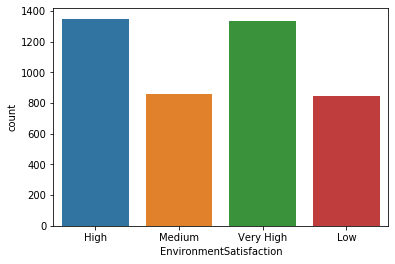

In [33]:
#Garphical representation
sns.countplot(x='EnvironmentSatisfaction',data=df)

On observe que la majorité des employés notent leurs conditions de travail comme bonnes voir très bonnes.

In [34]:
#Checking if there are missing values
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].fillna('High')
df['EnvironmentSatisfaction'].isnull().sum()

0

In [35]:
#Counting the number of time each values of JobSatisfaction
#has been given by employees
df['JobSatisfaction'].value_counts(ascending=False)

Very High    1367
High         1323
Low           860
Medium        840
Name: JobSatisfaction, dtype: int64

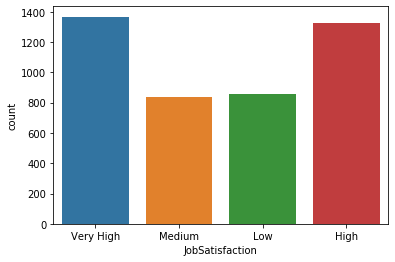

In [36]:
#Garphical representation
sns.countplot(x='JobSatisfaction',data=df)

Comme pour leurs conditions de travail, la majorité des employés notent leur appréciation de leur travail comme bonne voir très bonne.

In [37]:
#Checking if there are missing values and replacing them by the median value
df['JobSatisfaction'] = df['JobSatisfaction'].fillna('High')
df['JobSatisfaction'].isnull().sum()

0

In [38]:
df['WorkLifeBalance'].value_counts(ascending=False)

High         2660
Medium       1019
Very High     454
Low           239
Name: WorkLifeBalance, dtype: int64

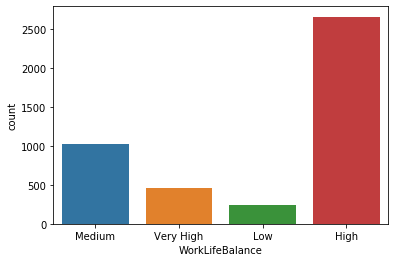

In [39]:
#Graphical Representation
sns.countplot(x='WorkLifeBalance', data=df)

In [40]:
#Checking if there are missing values and replacing them by the median value
df['WorkLifeBalance'] = df['WorkLifeBalance'].fillna('High')
df['WorkLifeBalance'].isnull().sum()

0

In [41]:
df['NumCompaniesWorked'].value_counts(ascending=False)

1.0    1558
0.0     586
3.0     474
2.0     438
4.0     415
7.0     222
6.0     208
5.0     187
9.0     156
8.0     147
Name: NumCompaniesWorked, dtype: int64

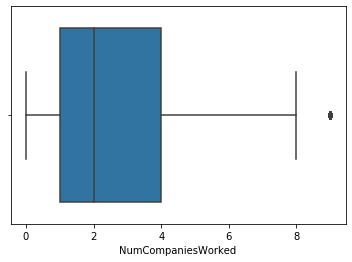

In [42]:
sns.boxplot(x='NumCompaniesWorked', data=df)

In [43]:
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].fillna(2)
df['NumCompaniesWorked'].isnull().sum()

0

In [44]:
df['TotalWorkingYears'].value_counts(ascending=False)

10.0    605
6.0     375
8.0     307
9.0     287
5.0     264
7.0     243
1.0     242
4.0     189
12.0    144
3.0     126
15.0    120
16.0    111
13.0    108
11.0    106
21.0    102
17.0     99
2.0      93
14.0     93
20.0     89
18.0     81
23.0     66
19.0     66
22.0     62
24.0     54
26.0     42
28.0     42
25.0     42
0.0      33
29.0     30
32.0     27
31.0     27
33.0     21
27.0     21
30.0     21
36.0     18
34.0     15
37.0     12
35.0      9
40.0      6
38.0      3
Name: TotalWorkingYears, dtype: int64

Text(0.5, 0, 'TotalWorkingYears')

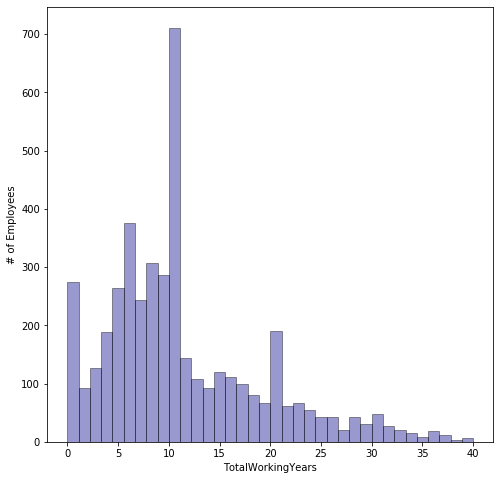

In [45]:
plt.figure(figsize=(8,8))
ax = sns.distplot(df['TotalWorkingYears'], hist=True, kde=False,
                 bins=int(180/5), color='darkblue',
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4})
ax.set_ylabel('# of Employees')
ax.set_xlabel('TotalWorkingYears')

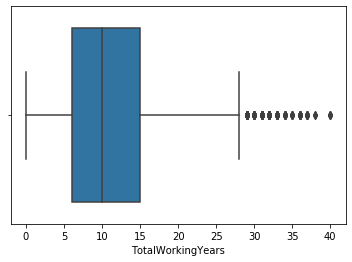

In [46]:
sns.boxplot(x='TotalWorkingYears',data=df)

In [47]:
df['TotalWorkingYears'] = df['TotalWorkingYears'].fillna(2)
df['TotalWorkingYears'].isnull().sum()

0

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4410 non-null   object 
 2   JobSatisfaction          4410 non-null   object 
 3   WorkLifeBalance          4410 non-null   object 
 4   JobInvolvement           4410 non-null   object 
 5   PerformanceRating        4410 non-null   object 
 6   Age                      4410 non-null   int64  
 7   Attrition                4410 non-null   object 
 8   BusinessTravel           4410 non-null   object 
 9   Department               4410 non-null   object 
 10  DistanceFromHome         4410 non-null   int64  
 11  Education                4410 non-null   object 
 12  EducationField           4410 non-null   object 
 13  Gender                   4410 non-null   object 
 14  JobLevel                

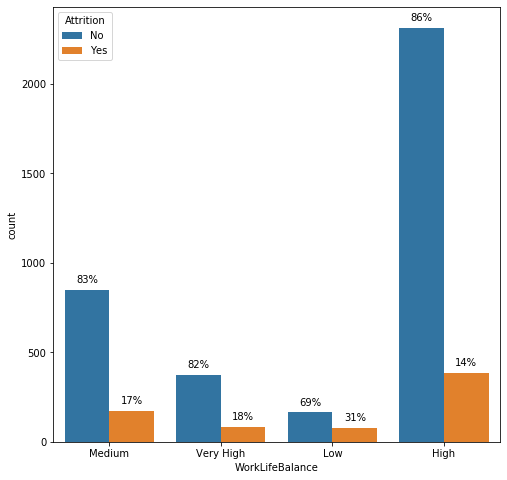

In [49]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='WorkLifeBalance', data=df,hue="Attrition")
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    
    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha = "center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha = "center")

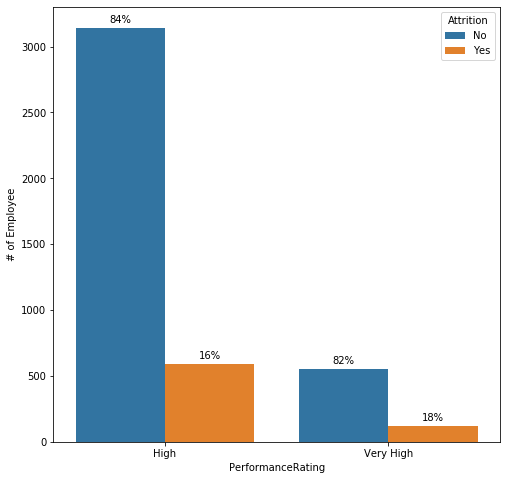

In [50]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='PerformanceRating', data=df, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

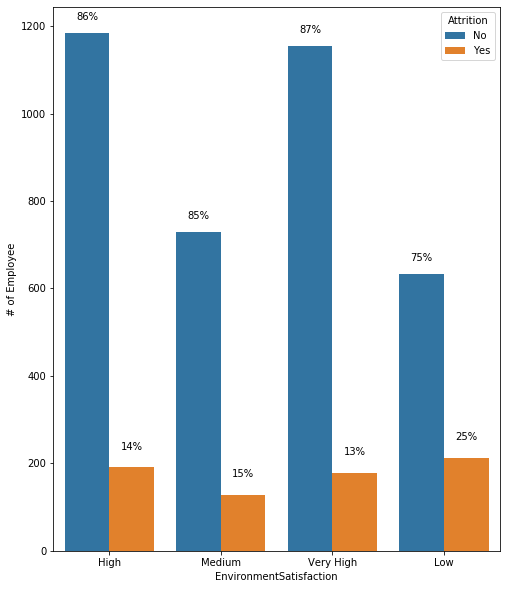

In [51]:
plt.figure(figsize=(8,10))
ax = sns.countplot(x='EnvironmentSatisfaction', data=df, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 30, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

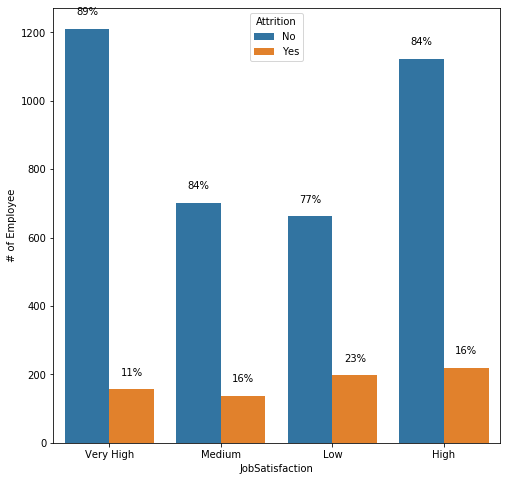

In [52]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='JobSatisfaction', data=df, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

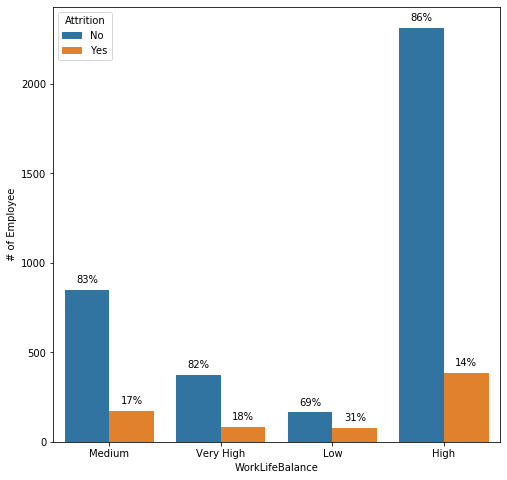

In [53]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='WorkLifeBalance', data=df, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

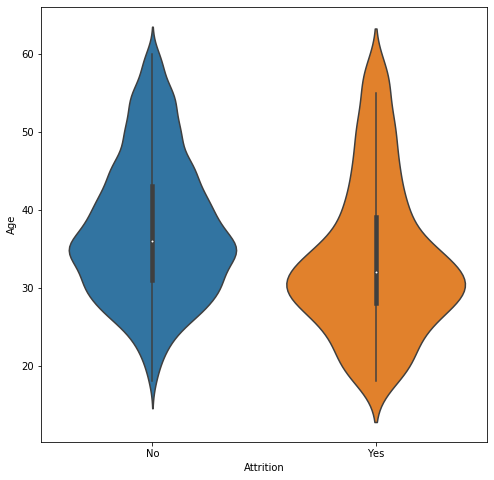

In [54]:
plt.figure(figsize=(8,8))
sns.violinplot(y='Age',x='Attrition',data=df)
plt.show()

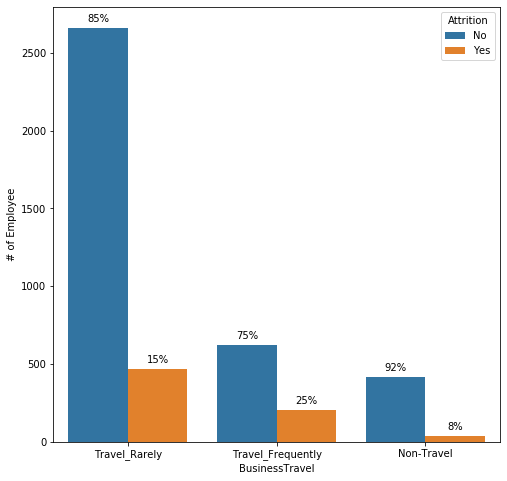

In [55]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='BusinessTravel', data=df, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

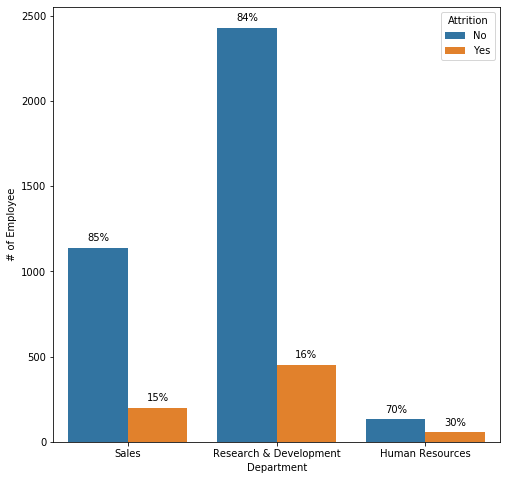

In [56]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='Department', data=df, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

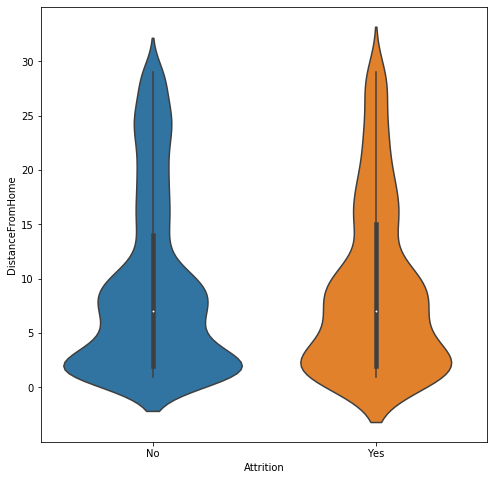

In [57]:
plt.figure(figsize=(8,8))
sns.violinplot(y='DistanceFromHome',x='Attrition',data=df)
plt.show()

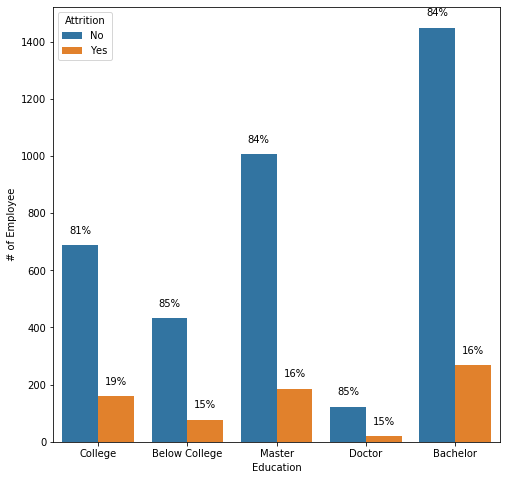

In [58]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='Education', data=df, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

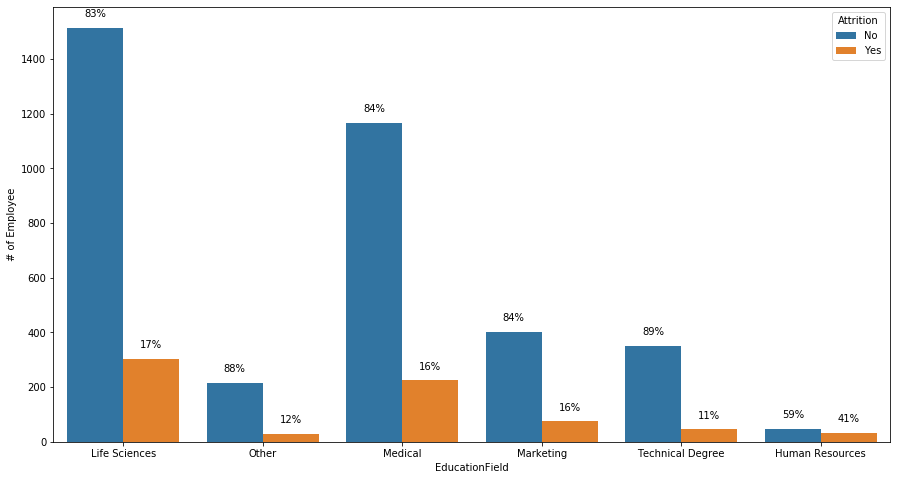

In [59]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='EducationField', data=df, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

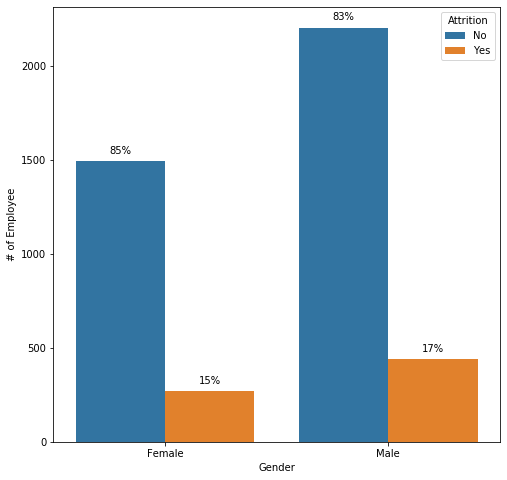

In [60]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='Gender', data=df, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

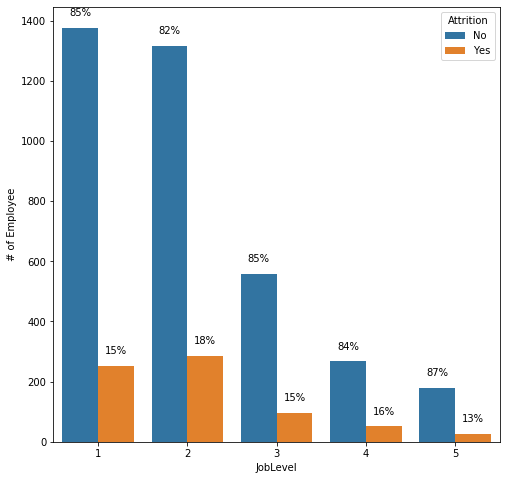

In [61]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='JobLevel', data=df, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

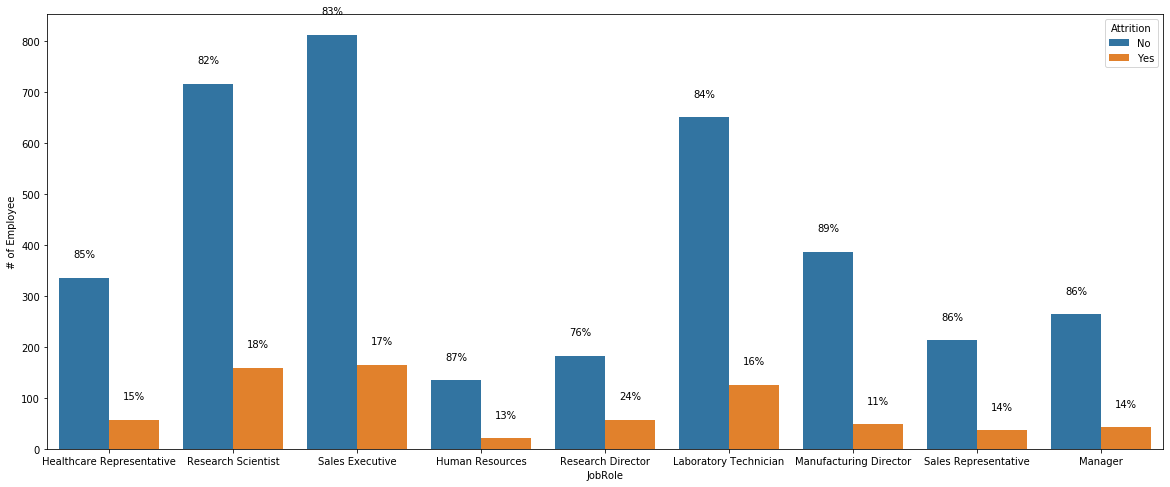

In [62]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x='JobRole', data=df, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

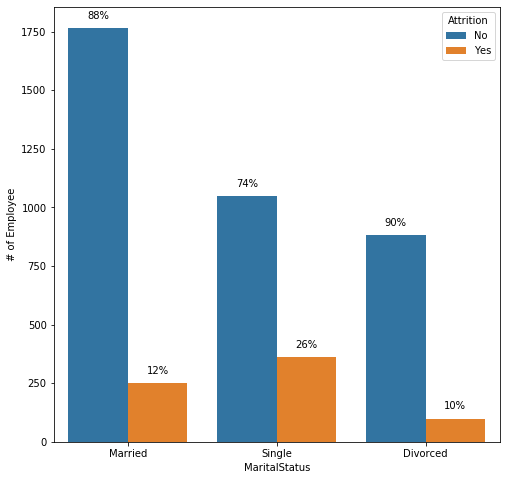

In [63]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='MaritalStatus', data=df, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

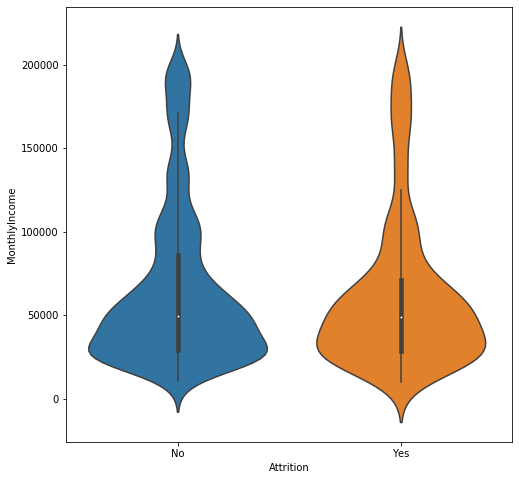

In [64]:
plt.figure(figsize=(8,8))
sns.violinplot(y='MonthlyIncome',x='Attrition',data=df)

plt.show()

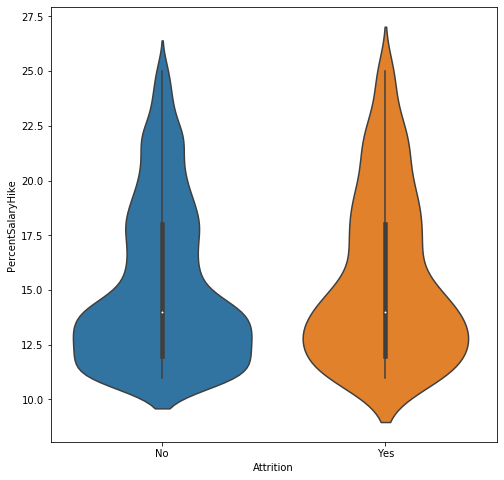

In [65]:
plt.figure(figsize=(8,8))
sns.violinplot(y='PercentSalaryHike',x='Attrition',data=df)

plt.show()

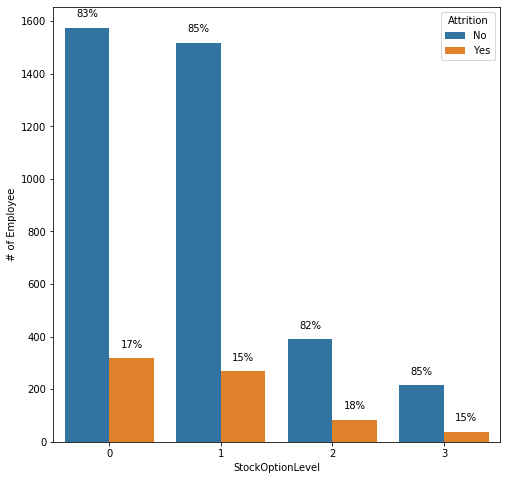

In [66]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='StockOptionLevel', data=df, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

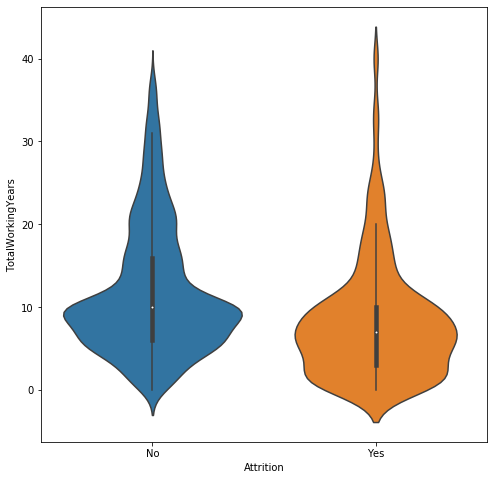

In [67]:
plt.figure(figsize=(8,8))
sns.violinplot(y='TotalWorkingYears',x='Attrition',data=df)

plt.show()

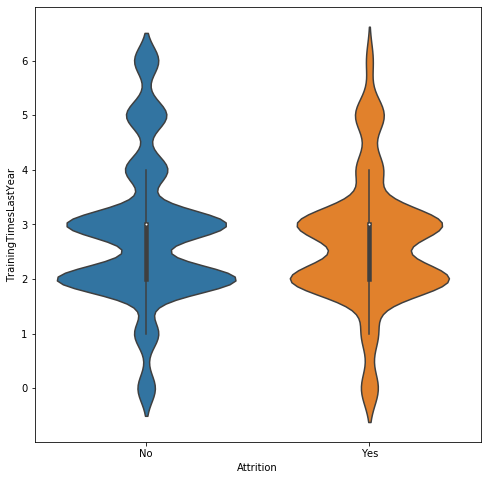

In [68]:
plt.figure(figsize=(8,8))
sns.violinplot(y='TrainingTimesLastYear',x='Attrition',data=df)

plt.show()

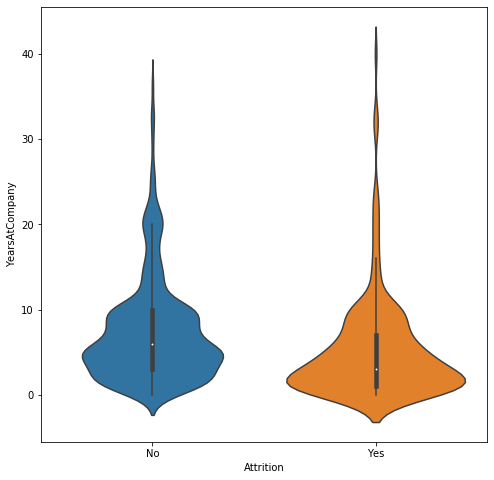

In [69]:
plt.figure(figsize=(8,8))
sns.violinplot(y='YearsAtCompany',x='Attrition',data=df)

plt.show()

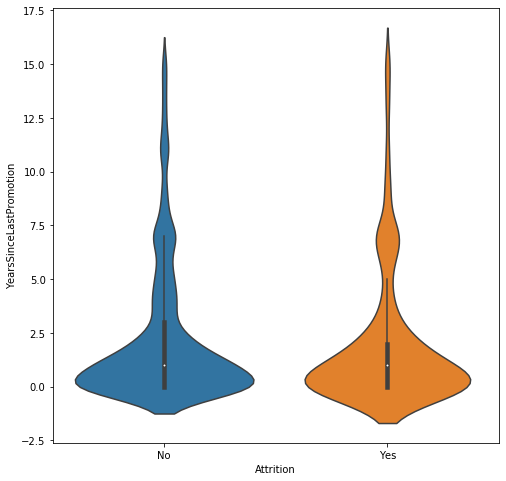

In [70]:
plt.figure(figsize=(8,8))
sns.violinplot(y='YearsSinceLastPromotion',x='Attrition',data=df)

plt.show()

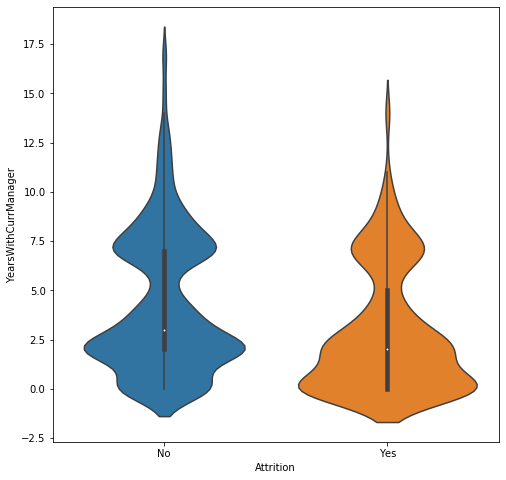

In [71]:
plt.figure(figsize=(8,8))
sns.violinplot(y='YearsWithCurrManager',x='Attrition',data=df)

plt.show()

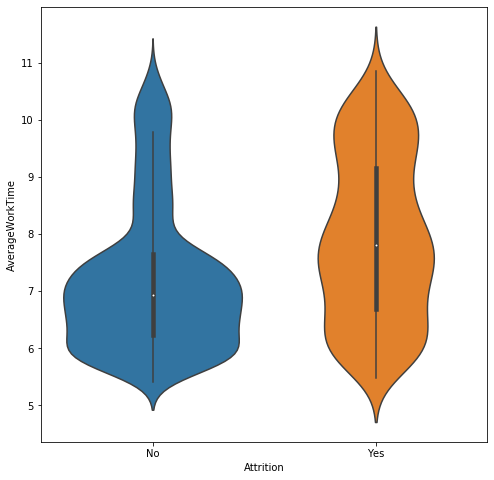

In [72]:
plt.figure(figsize=(8,8))
sns.violinplot(y='AverageWorkTime',x='Attrition',data=df)

plt.show()

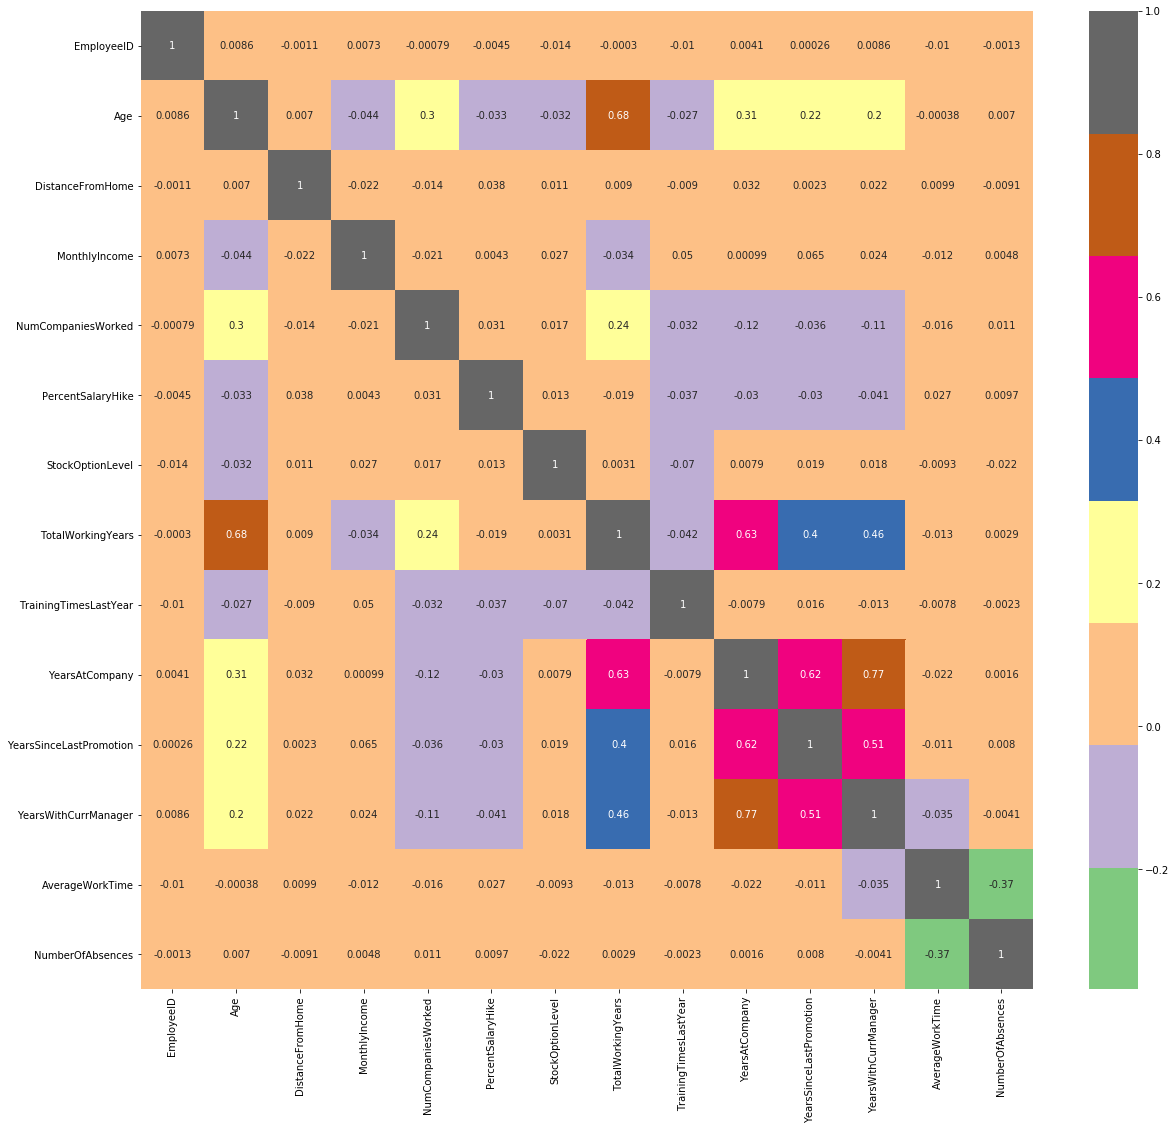

In [73]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(), annot = True, cmap="Accent");

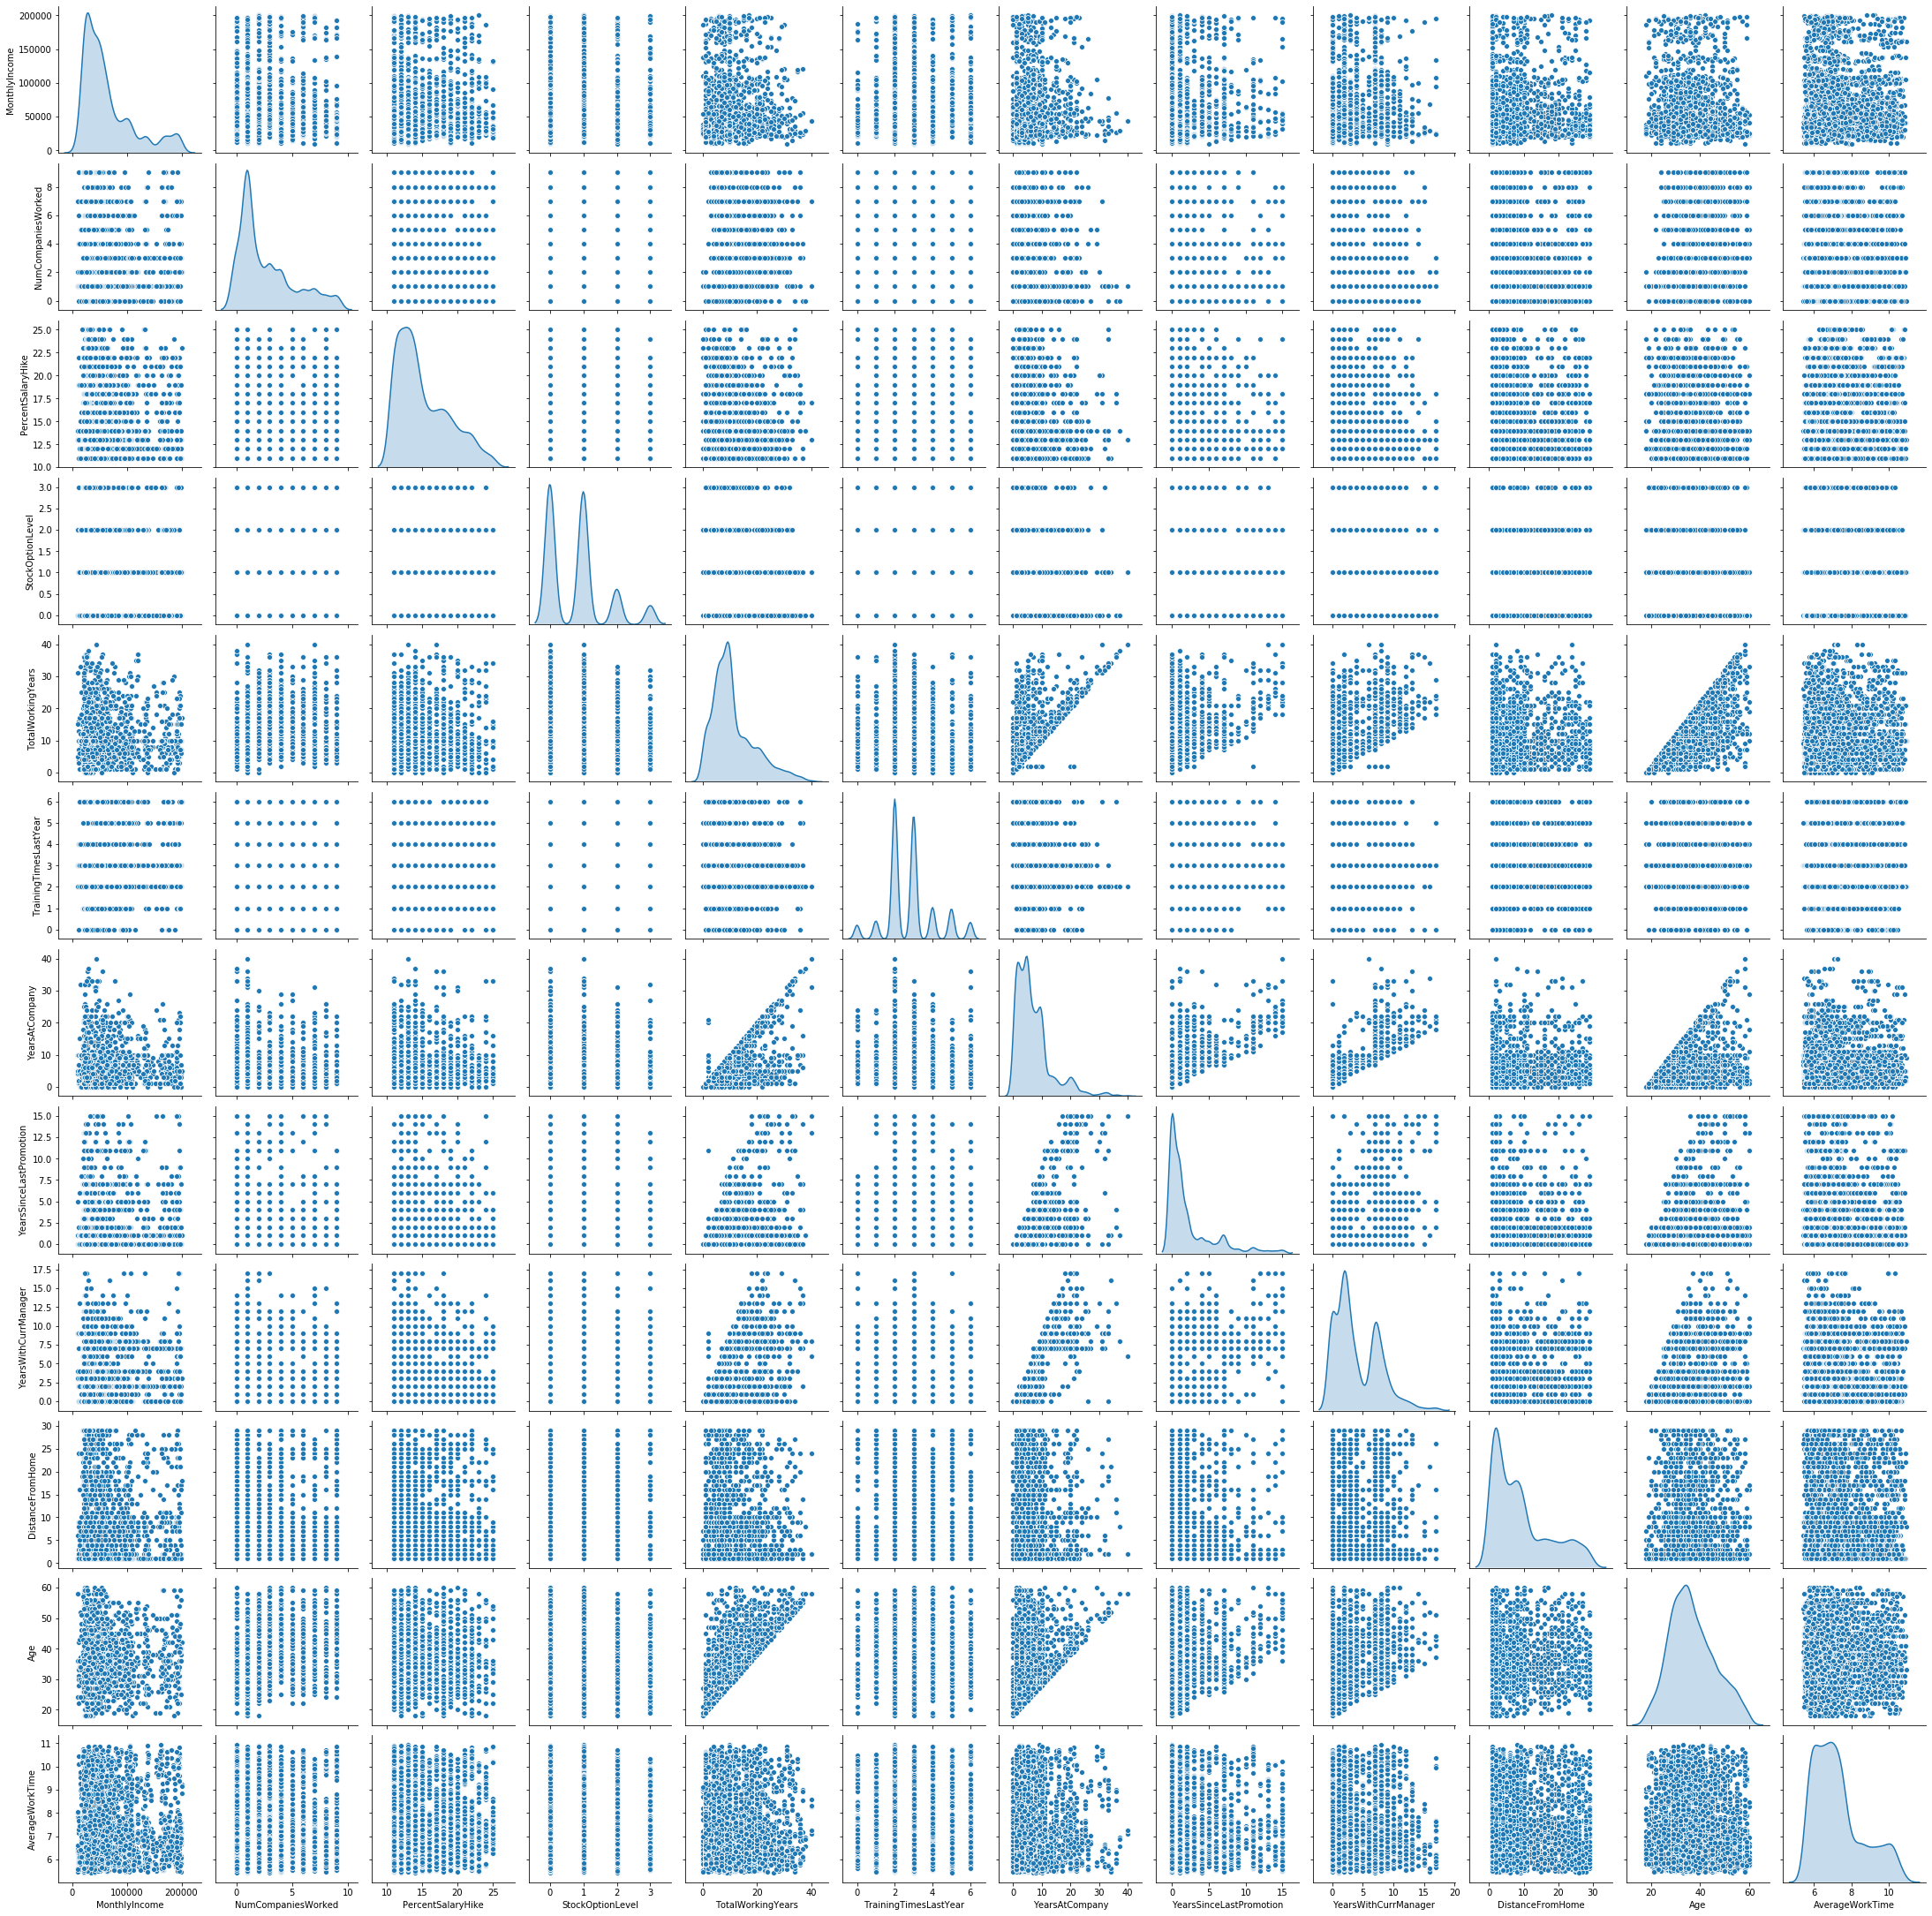

In [74]:
df_num=df[[ 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
           'DistanceFromHome','Age','AverageWorkTime']]

sns.pairplot(df_num, diag_kind='kde')
plt.show()

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4410 non-null   object 
 2   JobSatisfaction          4410 non-null   object 
 3   WorkLifeBalance          4410 non-null   object 
 4   JobInvolvement           4410 non-null   object 
 5   PerformanceRating        4410 non-null   object 
 6   Age                      4410 non-null   int64  
 7   Attrition                4410 non-null   object 
 8   BusinessTravel           4410 non-null   object 
 9   Department               4410 non-null   object 
 10  DistanceFromHome         4410 non-null   int64  
 11  Education                4410 non-null   object 
 12  EducationField           4410 non-null   object 
 13  Gender                   4410 non-null   object 
 14  JobLevel                

In [76]:
df.columns

Index(['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating', 'Age',
       'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'AverageWorkTime', 'NumberOfAbsences',
       'AverageInTime', 'AverageOutTime'],
      dtype='object')

In [77]:
#Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction',
                                 'JobSatisfaction', 'WorkLifeBalance','BusinessTravel', 'Department',
                                 'Education','EducationField', 'Gender', 'JobLevel', 'JobRole',
                                 'MaritalStatus']], drop_first=True)
#Droping unsable columns
df = df.drop(['AverageInTime','AverageOutTime'], 1)
#Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [78]:
df.head()

EmployeeID EnvironmentSatisfaction JobSatisfaction WorkLifeBalance  \
0           1                    High       Very High          Medium   
1           2                    High          Medium       Very High   
2           3                  Medium          Medium             Low   
3           4               Very High       Very High            High   
4           5               Very High             Low            High   

  JobInvolvement PerformanceRating  Age Attrition     BusinessTravel  \
0           High              High   51        No      Travel_Rarely   
1         Medium         Very High   31       Yes  Travel_Frequently   
2           High              High   32        No  Travel_Frequently   
3         Medium              High   38        No         Non-Travel   
4           High              High   32        No      Travel_Rarely   

               Department  DistanceFromHome      Education EducationField  \
0                   Sales                 6        College  Life Sciences   
1  Research & Development                10  Below College  Life Sciences   
2  Research & Development                17         Master          Other   
3  Research & Development                 2         Doctor  Life Sciences   
4  Research & Development                10  Below College        Medical   

   Gender JobLevel                    JobRole MaritalStatus  MonthlyIncome  \
0  Female        1  Healthcare Representative       Married         131160   
1  Female        1         Research Scientist        Single          41890   
2    Male        4            Sales Executive       Married         193280   
3    Male        3            Human Resources       Married          83210   
4    Male        1            Sales Executive        Single          23420   

   NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
0                 1.0                 11                 0                1.0   
1                 0.0                 23                 1                6.0   
2                 1.0                 15                 3                5.0   
3                 3.0                 11                 3               13.0   
4                 4.0                 12                 2                9.0   

   TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0                      6               1                        0   
1                      3               5                        1   
2                      2               5                        0   
3                      5               8                        7   
4                      2               6                        0   

   YearsWithCurrManager  AverageWorkTime  NumberOfAbsences  \
0                     0         6.870229                17   
1                     4         7.315971                13   
2                     3         6.816081                 7   
3                     5         6.789215                14   
4                     4         7.877561                 4   

   JobInvolvement_Low  JobInvolvement_Medium  JobInvolvement_Very High  \
0                   0                      0                         0   
1                   0                      1                         0   
2                   0                      0                         0   
3                   0                      1                         0   
4                   0                      0                         0   

   PerformanceRating_Very High  EnvironmentSatisfaction_Low  \
0                            0                            0   
1                            1                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   EnvironmentSatisfaction_Medium  EnvironmentSatisfaction_Very High  \
0                           

In [79]:
df.shape

(4410, 69)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 56 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   EmployeeID                         4410 non-null   int64  
 1   Age                                4410 non-null   int64  
 2   Attrition                          4410 non-null   int64  
 3   DistanceFromHome                   4410 non-null   int64  
 4   MonthlyIncome                      4410 non-null   int64  
 5   NumCompaniesWorked                 4410 non-null   float64
 6   PercentSalaryHike                  4410 non-null   int64  
 7   StockOptionLevel                   4410 non-null   int64  
 8   TotalWorkingYears                  4410 non-null   float64
 9   TrainingTimesLastYear              4410 non-null   int64  
 10  YearsAtCompany                     4410 non-null   int64  
 11  YearsSinceLastPromotion            4410 non-null   int64

In [80]:
#We have created dummies for the below variables, so we can drop them
df = df.drop(['JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction',
                                 'JobSatisfaction', 'WorkLifeBalance','BusinessTravel', 'Department',
                                 'Education','EducationField', 'Gender', 'JobLevel', 'JobRole',
                                 'MaritalStatus'], 1)

In [81]:
df.head()

EmployeeID  Age Attrition  DistanceFromHome  MonthlyIncome  \
0           1   51        No                 6         131160   
1           2   31       Yes                10          41890   
2           3   32        No                17         193280   
3           4   38        No                 2          83210   
4           5   32        No                10          23420   

   NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
0                 1.0                 11                 0                1.0   
1                 0.0                 23                 1                6.0   
2                 1.0                 15                 3                5.0   
3                 3.0                 11                 3               13.0   
4                 4.0                 12                 2                9.0   

   TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0                      6               1                        0   
1                      3               5                        1   
2                      2               5                        0   
3                      5               8                        7   
4                      2               6                        0   

   YearsWithCurrManager  AverageWorkTime  NumberOfAbsences  \
0                     0         6.870229                17   
1                     4         7.315971                13   
2                     3         6.816081                 7   
3                     5         6.789215                14   
4                     4         7.877561                 4   

   JobInvolvement_Low  JobInvolvement_Medium  JobInvolvement_Very High  \
0                   0                      0                         0   
1                   0                      1                         0   
2                   0                      0                         0   
3                   0                      1                         0   
4                   0                      0                         0   

   PerformanceRating_Very High  EnvironmentSatisfaction_Low  \
0                            0                            0   
1                            1                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   EnvironmentSatisfaction_Medium  EnvironmentSatisfaction_Very High  \
0                               0                                  0   
1                               0                                  0   
2                               1                                  0   
3                               0                                  1   
4                               0                                  1   

   JobSatisfaction_Low  JobSatisfaction_Medium  JobSatisfaction_Very High  \
0                    0                       0                          1   
1                    0                       1                          0   
2                    0                       1                          0   
3                    0                       0                          1   
4                    1                       0                          0   

   WorkLifeBalance_Low  WorkLifeBalance_Medium  WorkLifeBalance_Very High  \
0                    0                       1                          0   
1                    0                       0                          1   
2                    1                       0                          0   
3                    0                       0                          0   
4                    0                       0                          0   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                 0                             1   
1               

In [82]:
df.shape

(4410, 56)

In [83]:
df['Attrition']=df['Attrition'].replace({'Yes':1, "No":0})

In [84]:
df.head()

EmployeeID  Age  Attrition  DistanceFromHome  MonthlyIncome  \
0           1   51          0                 6         131160   
1           2   31          1                10          41890   
2           3   32          0                17         193280   
3           4   38          0                 2          83210   
4           5   32          0                10          23420   

   NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
0                 1.0                 11                 0                1.0   
1                 0.0                 23                 1                6.0   
2                 1.0                 15                 3                5.0   
3                 3.0                 11                 3               13.0   
4                 4.0                 12                 2                9.0   

   TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0                      6               1                        0   
1                      3               5                        1   
2                      2               5                        0   
3                      5               8                        7   
4                      2               6                        0   

   YearsWithCurrManager  AverageWorkTime  NumberOfAbsences  \
0                     0         6.870229                17   
1                     4         7.315971                13   
2                     3         6.816081                 7   
3                     5         6.789215                14   
4                     4         7.877561                 4   

   JobInvolvement_Low  JobInvolvement_Medium  JobInvolvement_Very High  \
0                   0                      0                         0   
1                   0                      1                         0   
2                   0                      0                         0   
3                   0                      1                         0   
4                   0                      0                         0   

   PerformanceRating_Very High  EnvironmentSatisfaction_Low  \
0                            0                            0   
1                            1                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   EnvironmentSatisfaction_Medium  EnvironmentSatisfaction_Very High  \
0                               0                                  0   
1                               0                                  0   
2                               1                                  0   
3                               0                                  1   
4                               0                                  1   

   JobSatisfaction_Low  JobSatisfaction_Medium  JobSatisfaction_Very High  \
0                    0                       0                          1   
1                    0                       1                          0   
2                    0                       1                          0   
3                    0                       0                          1   
4                    1                       0                          0   

   WorkLifeBalance_Low  WorkLifeBalance_Medium  WorkLifeBalance_Very High  \
0                    0                       1                          0   
1                    0                       0                          1   
2                    1                       0                          0   
3                    0                       0                          0   
4                    0                       0                          0   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                 0                             1   
1         

In [85]:
df.shape

(4410, 56)

In [86]:
from sklearn.model_selection import train_test_split
#Putting feature variable to X
X = df.drop(['Attrition'], axis=1)
X.head()

EmployeeID  Age  DistanceFromHome  MonthlyIncome  NumCompaniesWorked  \
0           1   51                 6         131160                 1.0   
1           2   31                10          41890                 0.0   
2           3   32                17         193280                 1.0   
3           4   38                 2          83210                 3.0   
4           5   32                10          23420                 4.0   

   PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
0                 11                 0                1.0   
1                 23                 1                6.0   
2                 15                 3                5.0   
3                 11                 3               13.0   
4                 12                 2                9.0   

   TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0                      6               1                        0   
1                      3               5                        1   
2                      2               5                        0   
3                      5               8                        7   
4                      2               6                        0   

   YearsWithCurrManager  AverageWorkTime  NumberOfAbsences  \
0                     0         6.870229                17   
1                     4         7.315971                13   
2                     3         6.816081                 7   
3                     5         6.789215                14   
4                     4         7.877561                 4   

   JobInvolvement_Low  JobInvolvement_Medium  JobInvolvement_Very High  \
0                   0                      0                         0   
1                   0                      1                         0   
2                   0                      0                         0   
3                   0                      1                         0   
4                   0                      0                         0   

   PerformanceRating_Very High  EnvironmentSatisfaction_Low  \
0                            0                            0   
1                            1                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   EnvironmentSatisfaction_Medium  EnvironmentSatisfaction_Very High  \
0                               0                                  0   
1                               0                                  0   
2                               1                                  0   
3                               0                                  1   
4                               0                                  1   

   JobSatisfaction_Low  JobSatisfaction_Medium  JobSatisfaction_Very High  \
0                    0                       0                          1   
1                    0                       1                          0   
2                    0                       1                          0   
3                    0                       0                          1   
4                    1                       0                          0   

   WorkLifeBalance_Low  WorkLifeBalance_Medium  WorkLifeBalance_Very High  \
0                    0                       1                          0   
1                    0                       0                          1   
2                    1                       0                          0   
3                    0                       0                          0   
4                    0                       0                          0   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                 0                             1   
1                                 1                             0   
2      

In [87]:
X.shape

(4410, 55)

In [88]:
#Putting response variable to y
y = df['Attrition']
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Attrition, dtype: int64

In [89]:
y.shape

(4410,)

In [90]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [91]:
X_train.head()

EmployeeID  Age  DistanceFromHome  MonthlyIncome  NumCompaniesWorked  \
537          538   37                 7          71430                 2.0   
1881        1882   39                10          66960                 7.0   
2367        2368   39                 2          72640                 0.0   
3619        3620   39                29          54600                 6.0   
1398        1399   40                11          70050                 1.0   

      PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
537                  21                 0                8.0   
1881                 11                 0                8.0   
2367                 17                 0                2.0   
3619                 13                 2               21.0   
1398                 20                 2               21.0   

      TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
537                       6               1                        0   
1881                      3               2                        2   
2367                      5              10                        0   
3619                      3              19                       15   
1398                      2              20                        9   

      YearsWithCurrManager  AverageWorkTime  NumberOfAbsences  \
537                      0        10.412441                 4   
1881                     2        10.348739                 8   
2367                     7         6.257680                23   
3619                     2         7.767506                19   
1398                     9         5.882338                13   

      JobInvolvement_Low  JobInvolvement_Medium  JobInvolvement_Very High  \
537                    0                      1                         0   
1881                   0                      0                         0   
2367                   0                      0                         0   
3619                   0                      0                         0   
1398                   0                      0                         0   

      PerformanceRating_Very High  EnvironmentSatisfaction_Low  \
537                             1                            0   
1881                            0                            0   
2367                            0                            0   
3619                            0                            0   
1398                            1                            0   

      EnvironmentSatisfaction_Medium  EnvironmentSatisfaction_Very High  \
537                                0                                  1   
1881                               0                                  1   
2367                               0                                  0   
3619                               0                                  0   
1398                               0                                  1   

      JobSatisfaction_Low  JobSatisfaction_Medium  JobSatisfaction_Very High  \
537                     0                       0                          1   
1881                    1                       0                          0   
2367                    0                       0                          0   
3619                    0                       1                          0   
1398                    0                       0                          0   

      WorkLifeBalance_Low  WorkLifeBalance_Medium  WorkLifeBalance_Very High  \
537                     0                       0                          0   
1881                    1                       0                          0   
2367                    0                       0                          0   
3619                    0                       0                          0   
1398                    0                       0                          0   

      BusinessTravel_Travel_Frequently  BusinessTravel_

In [92]:
X_train.shape

(3087, 55)

In [93]:
X_test.head()

EmployeeID  Age  DistanceFromHome  MonthlyIncome  NumCompaniesWorked  \
4020        4021   30                12          49500                 1.0   
1697        1698   27                22          22060                 0.0   
2481        2482   43                16          67820                 0.0   
1039        1040   26                 2          65780                 0.0   
93            94   32                 2          57470                 1.0   

      PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
4020                 12                 2                1.0   
1697                 14                 1                6.0   
2481                 16                 1               10.0   
1039                 15                 2                6.0   
93                   13                 0                8.0   

      TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
4020                      3               1                        0   
1697                      4               5                        0   
2481                      2               9                        1   
1039                      3               5                        1   
93                        0               8                        0   

      YearsWithCurrManager  AverageWorkTime  NumberOfAbsences  \
4020                     0         7.284448                14   
1697                     3         7.286398                18   
2481                     8         5.681396                17   
1039                     4         8.030914                19   
93                       7         7.164133                18   

      JobInvolvement_Low  JobInvolvement_Medium  JobInvolvement_Very High  \
4020                   0                      0                         0   
1697                   0                      0                         0   
2481                   0                      0                         0   
1039                   0                      1                         0   
93                     0                      0                         0   

      PerformanceRating_Very High  EnvironmentSatisfaction_Low  \
4020                            0                            0   
1697                            0                            1   
2481                            0                            0   
1039                            0                            0   
93                              0                            0   

      EnvironmentSatisfaction_Medium  EnvironmentSatisfaction_Very High  \
4020                               1                                  0   
1697                               0                                  0   
2481                               1                                  0   
1039                               0                                  1   
93                                 0                                  0   

      JobSatisfaction_Low  JobSatisfaction_Medium  JobSatisfaction_Very High  \
4020                    0                       0                          1   
1697                    0                       0                          0   
2481                    0                       0                          1   
1039                    0                       1                          0   
93                      0                       1                          0   

      WorkLifeBalance_Low  WorkLifeBalance_Medium  WorkLifeBalance_Very High  \
4020                    0                       1                          0   
1697                    0                       1                          0   
2481                    0                       0                          0   
1039                    0                       0                          0   
93                      0                       0                          0   

      BusinessTravel_Travel_Frequently  BusinessTravel_

In [94]:
y_train.head()

537     0
1881    1
2367    0
3619    0
1398    0
Name: Attrition, dtype: int64

In [95]:
y_test.shape

(1323,)

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[[ 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
           'DistanceFromHome','Age','AverageWorkTime']] = scaler.fit_transform(X_train[[ 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
           'DistanceFromHome','Age','AverageWorkTime']])
X_train.head()

EmployeeID       Age  DistanceFromHome  MonthlyIncome  \
537          538  0.030760         -0.283046       0.152540   
1881        1882  0.250309          0.085061       0.056813   
2367        2368  0.250309         -0.896558       0.178452   
3619        3620  0.250309          2.416405      -0.207879   
1398        1399  0.360084          0.207763       0.122987   

      NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  \
537            -0.288498           1.583604         -0.931688   
1881            1.717345          -1.157403         -0.931688   
2367           -1.090836           0.487201         -0.931688   
3619            1.316176          -0.609202          1.431600   
1398           -0.689667           1.309504          1.431600   

      TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
537           -0.411901               2.444365       -0.982464   
1881          -0.411901               0.128532       -0.818401   
2367          -1.183388               1.672421        0.494102   
3619           1.259654               0.128532        1.970667   
1398           1.259654              -0.643412        2.134730   

      YearsSinceLastPromotion  YearsWithCurrManager  AverageWorkTime  \
537                 -0.690579             -1.160407         2.315455   
1881                -0.065779             -0.599245         2.267723   
2367                -0.690579              0.803659        -0.797735   
3619                 3.995420             -0.599245         0.333588   
1398                 2.121020              1.364821        -1.078980   

      NumberOfAbsences  JobInvolvement_Low  JobInvolvement_Medium  \
537                  4                   0                      1   
1881                 8                   0                      0   
2367                23                   0                      0   
3619                19                   0                      0   
1398                13                   0                      0   

      JobInvolvement_Very High  PerformanceRating_Very High  \
537                          0                            1   
1881                         0                            0   
2367                         0                            0   
3619                         0                            0   
1398                         0                            1   

      EnvironmentSatisfaction_Low  EnvironmentSatisfaction_Medium  \
537                             0                               0   
1881                            0                               0   
2367                            0                               0   
3619                            0                               0   
1398                            0                               0   

      EnvironmentSatisfaction_Very High  JobSatisfaction_Low  \
537                                   1                    0   
1881                                  1                    1   
2367                                  0                    0   
3619                                  0                    0   
1398                                  1                    0   

      JobSatisfaction_Medium  JobSatisfaction_Very High  WorkLifeBalance_Low  \
537                        0                          1                    0   
1881                       0                          0                    1   
2367                       0                          0                    0   
3619                       1                          0                    0   
1398                       0                          0                    0   

      WorkLifeBalance_Medium  WorkLifeBalance_Very High  \
537                        0                          0   
1881                       0                          0   
2367                       0                          0   
3619                       0                          0   
1398                       0        

In [97]:
#Checking the Attrition Rate
Attrition = (sum(df['Attrition'])/len(df['Attrition'].index))*100
Attrition

16.122448979591837

Environ 16.3% des employés finissent par quitter leur poste dans l'entreprise

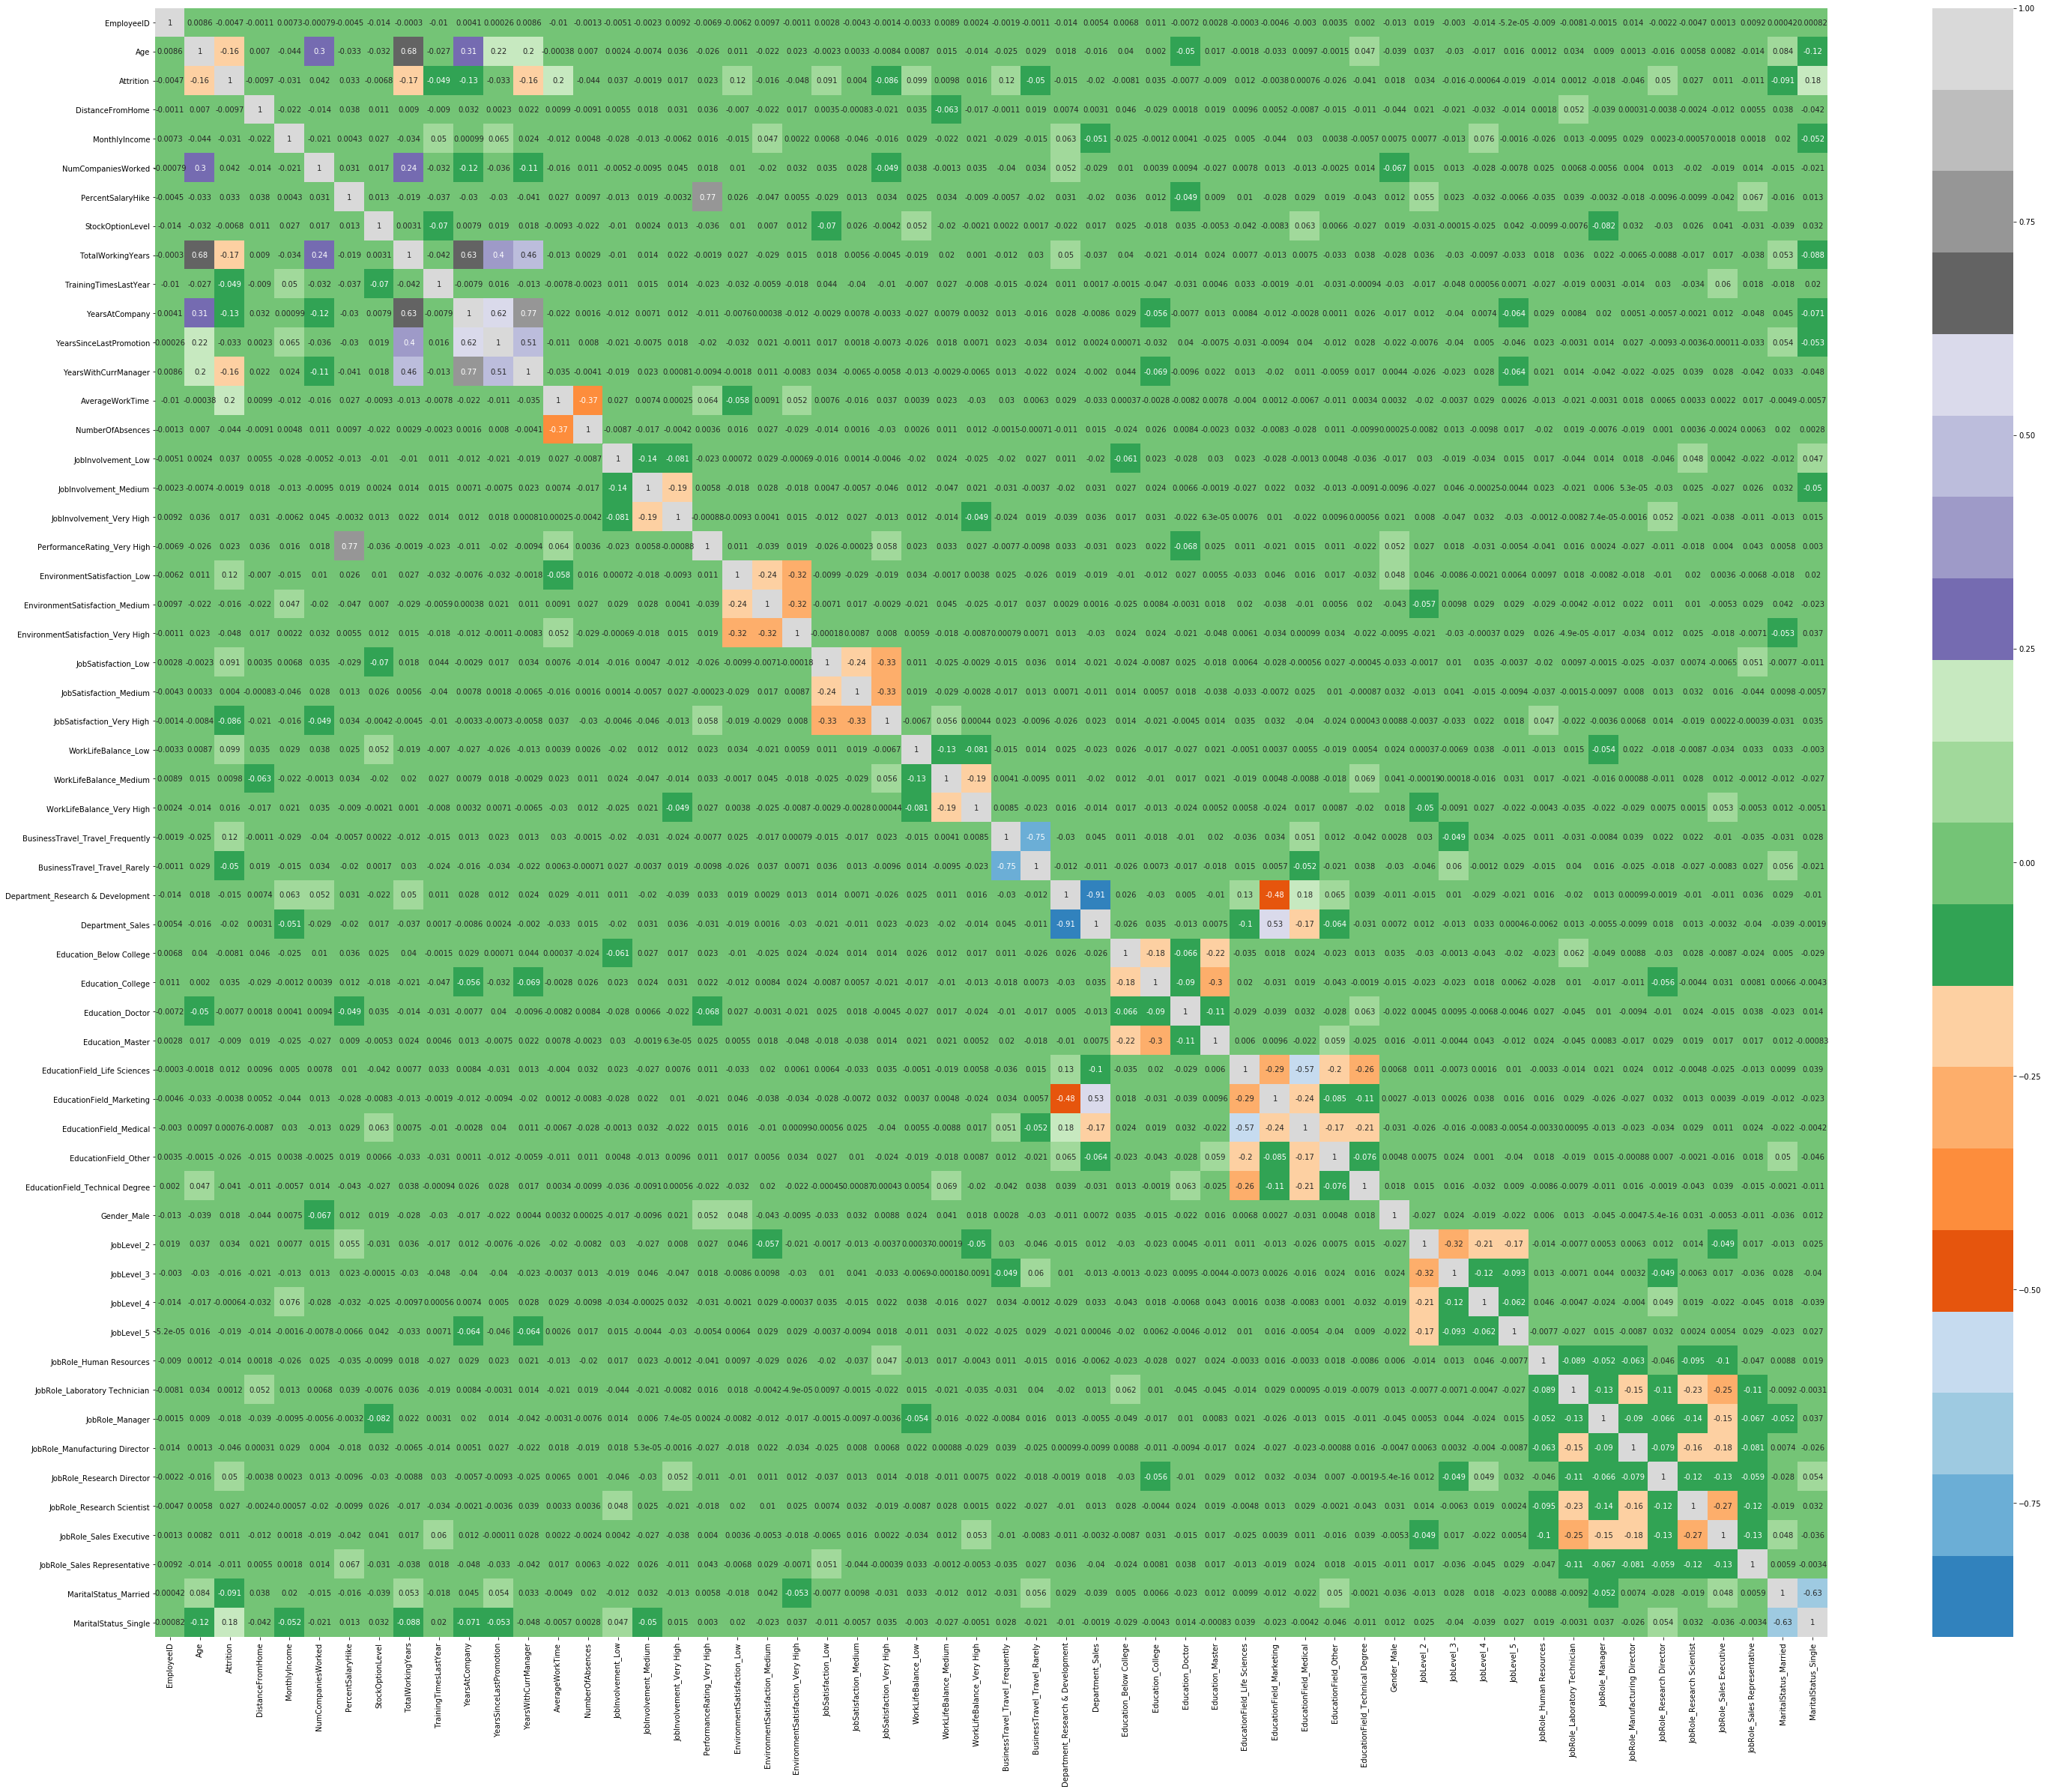

In [98]:
#Let's see the correlation matrix 
plt.figure(figsize = (50,40))   
sns.heatmap(df.corr(),annot = True,cmap="tab20c")
plt.show()

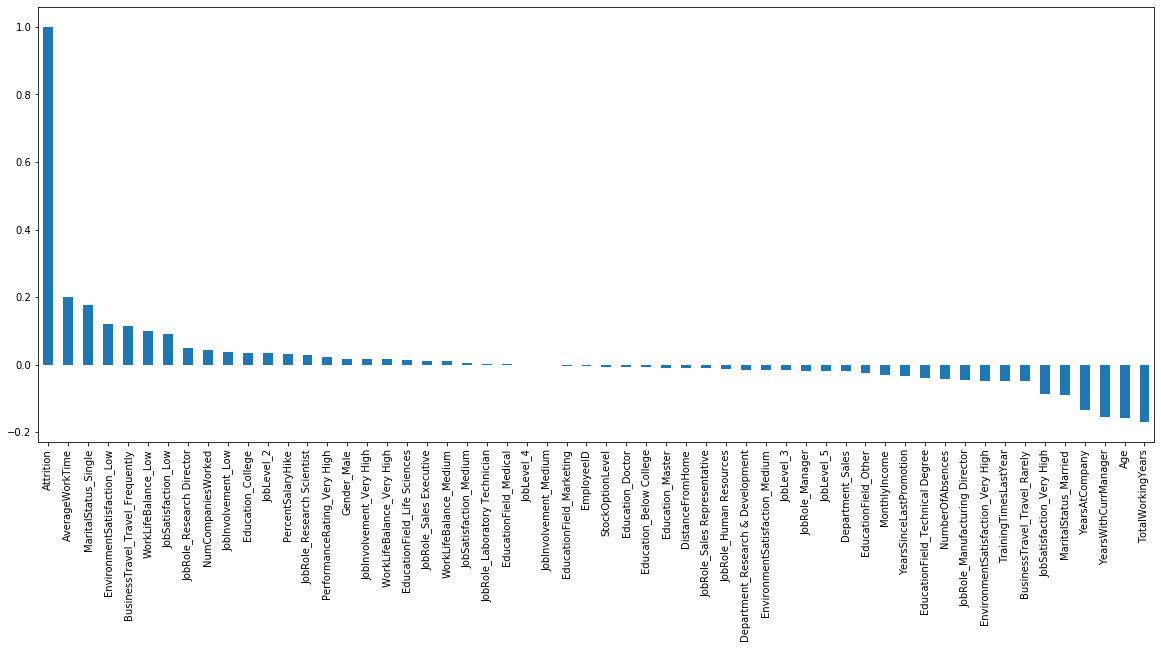

In [99]:
plt.figure(figsize=(20,8))
df.corr()['Attrition'].sort_values(ascending=False).plot(kind='bar')

In [100]:
corrmat = X_train.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
matrix= corrdf.sort_values(by = 'Correlation', ascending = False).head(50)
matrix

Var1                               Var2  \
1679                   Department_Sales  Department_Research & Development   
614                YearsWithCurrManager                     YearsAtCompany   
940         PerformanceRating_Very High                  PercentSalaryHike   
1567       BusinessTravel_Travel_Rarely   BusinessTravel_Travel_Frequently   
386                   TotalWorkingYears                                Age   
3023               MaritalStatus_Single              MaritalStatus_Married   
502                      YearsAtCompany                  TotalWorkingYears   
559             YearsSinceLastPromotion                     YearsAtCompany   
2070             EducationField_Medical       EducationField_Life Sciences   
2010           EducationField_Marketing                   Department_Sales   
615                YearsWithCurrManager            YearsSinceLastPromotion   
612                YearsWithCurrManager                  TotalWorkingYears   
2009           EducationField_Marketing  Department_Research & Development   
557             YearsSinceLastPromotion                  TotalWorkingYears   
727                    NumberOfAbsences                    AverageWorkTime   
1287          JobSatisfaction_Very High             JobSatisfaction_Medium   
1286          JobSatisfaction_Very High                JobSatisfaction_Low   
496                      YearsAtCompany                                Age   
1119  EnvironmentSatisfaction_Very High     EnvironmentSatisfaction_Medium   
1118  EnvironmentSatisfaction_Very High        EnvironmentSatisfaction_Low   
2351                         JobLevel_3                         JobLevel_2   
221                  NumCompaniesWorked                                Age   
2015           EducationField_Marketing       EducationField_Life Sciences   
1902                   Education_Master                  Education_College   
2855            JobRole_Sales Executive         JobRole_Research Scientist   
2180    EducationField_Technical Degree       EducationField_Life Sciences   
2851            JobRole_Sales Executive      JobRole_Laboratory Technician   
389                   TotalWorkingYears                 NumCompaniesWorked   
1231             JobSatisfaction_Medium                JobSatisfaction_Low   
1063     EnvironmentSatisfaction_Medium        EnvironmentSatisfaction_Low   
2071             EducationField_Medical           EducationField_Marketing   
2796         JobRole_Research Scientist      JobRole_Laboratory Technician   
606                YearsWithCurrManager                                Age   
1901                   Education_Master            Education_Below College   
551             YearsSinceLastPromotion                                Age   
2125               EducationField_Other       EducationField_Life Sciences   
2406                         JobLevel_4                         JobLevel_2   
2182    EducationField_Technical Degree             EducationField_Medical   
1455          WorkLifeBalance_Very High             WorkLifeBalance_Medium   
895            JobInvolvement_Very High              JobInvolvement_Medium   
2853            JobRole_Sales Executive     JobRole_Manufacturing Director   
1791                  Education_College            Education_Below College   
2064             EducationField_Medical  Department_Research & Development   
2127               EducationField_Other             EducationField_Medical   
2461                         JobLevel_5                         JobLevel_2   
2798         JobRole_Research Scientist     JobRole_Manufacturing Director   
2065             EducationField_Medical                   Department_Sales   
2686     JobRole_Manufacturing Director      JobRole_Laboratory Technician   
2852            JobRole_Sales Executive                    JobRole_Manager   
839               JobInvolvement_Medium                 JobInvolvement_Low   

      Correlation  
1679         0.90  
614          0.7

In [101]:
unique=list(set(matrix.Var2))
len(unique)

28

In [102]:
X_test = X_test.drop(unique,1)
X_train = X_train.drop(unique,1)

In [103]:
X_test.shape

(1323, 27)

In [104]:
X_test.head()

EmployeeID  DistanceFromHome  MonthlyIncome  StockOptionLevel  \
4020        4021                12          49500                 2   
1697        1698                22          22060                 1   
2481        2482                16          67820                 1   
1039        1040                 2          65780                 2   
93            94                 2          57470                 0   

      TrainingTimesLastYear  YearsWithCurrManager  NumberOfAbsences  \
4020                      3                     0                14   
1697                      4                     3                18   
2481                      2                     8                17   
1039                      3                     4                19   
93                        0                     7                18   

      JobInvolvement_Very High  PerformanceRating_Very High  \
4020                         0                            0   
1697                         0                            0   
2481                         0                            0   
1039                         0                            0   
93                           0                            0   

      EnvironmentSatisfaction_Very High  JobSatisfaction_Very High  \
4020                                  0                          1   
1697                                  0                          0   
2481                                  0                          1   
1039                                  1                          0   
93                                    0                          0   

      WorkLifeBalance_Low  WorkLifeBalance_Very High  \
4020                    0                          0   
1697                    0                          0   
2481                    0                          0   
1039                    0                          0   
93                      0                          0   

      BusinessTravel_Travel_Rarely  Education_Doctor  Education_Master  \
4020                             1                 0                 1   
1697                             1                 0                 1   
2481                             1                 0                 0   
1039                             1                 0                 0   
93                               1                 0                 0   

      EducationField_Other  EducationField_Technical Degree  Gender_Male  \
4020                     0                                0            0   
1697                     0                                0            1   
2481                     0                                0            0   
1039                     0                                1            0   
93                       0                                0            1   

      JobLevel_3  JobLevel_4  JobLevel_5  JobRole_Human Resources  \
4020           0           0           0                        0   
1697           0           0           0                        0   
2481           0           0           0                        0   
1039           1           0           0                        0   
93             0           0           0                        0   

      JobRole_Research Director  JobRole_Sales Executive  \
4020                          0                        1   
1697                          0                        0   
2481                          0                        0   
1039                          0                        1   
93                            0                        0   

      JobRole_Sales Representative  MaritalStatus_Single  
4020                             0                     1  
1697                             1                     0  
2481                             0                     1  
1039                             0                     0  
93                               0        

In [105]:
X_train.head()

EmployeeID  DistanceFromHome  MonthlyIncome  StockOptionLevel  \
537          538         -0.283046       0.152540         -0.931688   
1881        1882          0.085061       0.056813         -0.931688   
2367        2368         -0.896558       0.178452         -0.931688   
3619        3620          2.416405      -0.207879          1.431600   
1398        1399          0.207763       0.122987          1.431600   

      TrainingTimesLastYear  YearsWithCurrManager  NumberOfAbsences  \
537                2.444365             -1.160407                 4   
1881               0.128532             -0.599245                 8   
2367               1.672421              0.803659                23   
3619               0.128532             -0.599245                19   
1398              -0.643412              1.364821                13   

      JobInvolvement_Very High  PerformanceRating_Very High  \
537                          0                            1   
1881                         0                            0   
2367                         0                            0   
3619                         0                            0   
1398                         0                            1   

      EnvironmentSatisfaction_Very High  JobSatisfaction_Very High  \
537                                   1                          1   
1881                                  1                          0   
2367                                  0                          0   
3619                                  0                          0   
1398                                  1                          0   

      WorkLifeBalance_Low  WorkLifeBalance_Very High  \
537                     0                          0   
1881                    1                          0   
2367                    0                          0   
3619                    0                          0   
1398                    0                          0   

      BusinessTravel_Travel_Rarely  Education_Doctor  Education_Master  \
537                              1                 0                 1   
1881                             1                 0                 1   
2367                             1                 0                 1   
3619                             1                 0                 0   
1398                             1                 0                 0   

      EducationField_Other  EducationField_Technical Degree  Gender_Male  \
537                      0                                0            1   
1881                     0                                0            0   
2367                     0                                0            1   
3619                     0                                0            0   
1398                     0                                0            0   

      JobLevel_3  JobLevel_4  JobLevel_5  JobRole_Human Resources  \
537            0           1           0                        0   
1881           0           1           0                        1   
2367           0           0           0                        0   
3619           0           0           0                        0   
1398           0           0           0                        0   

      JobRole_Research Director  JobRole_Sales Executive  \
537                           0                        1   
1881                          0                        0   
2367                          0                        0   
3619                          0                        0   
1398                          0                        1   

      JobRole_Sales Representative  MaritalStatus_Single  
537                              0                     0  
1881                             0                     0  
2367                             0                     0  
3619                             0                     0  
1398                             0        

In [106]:
X_train.shape

(3087, 27)

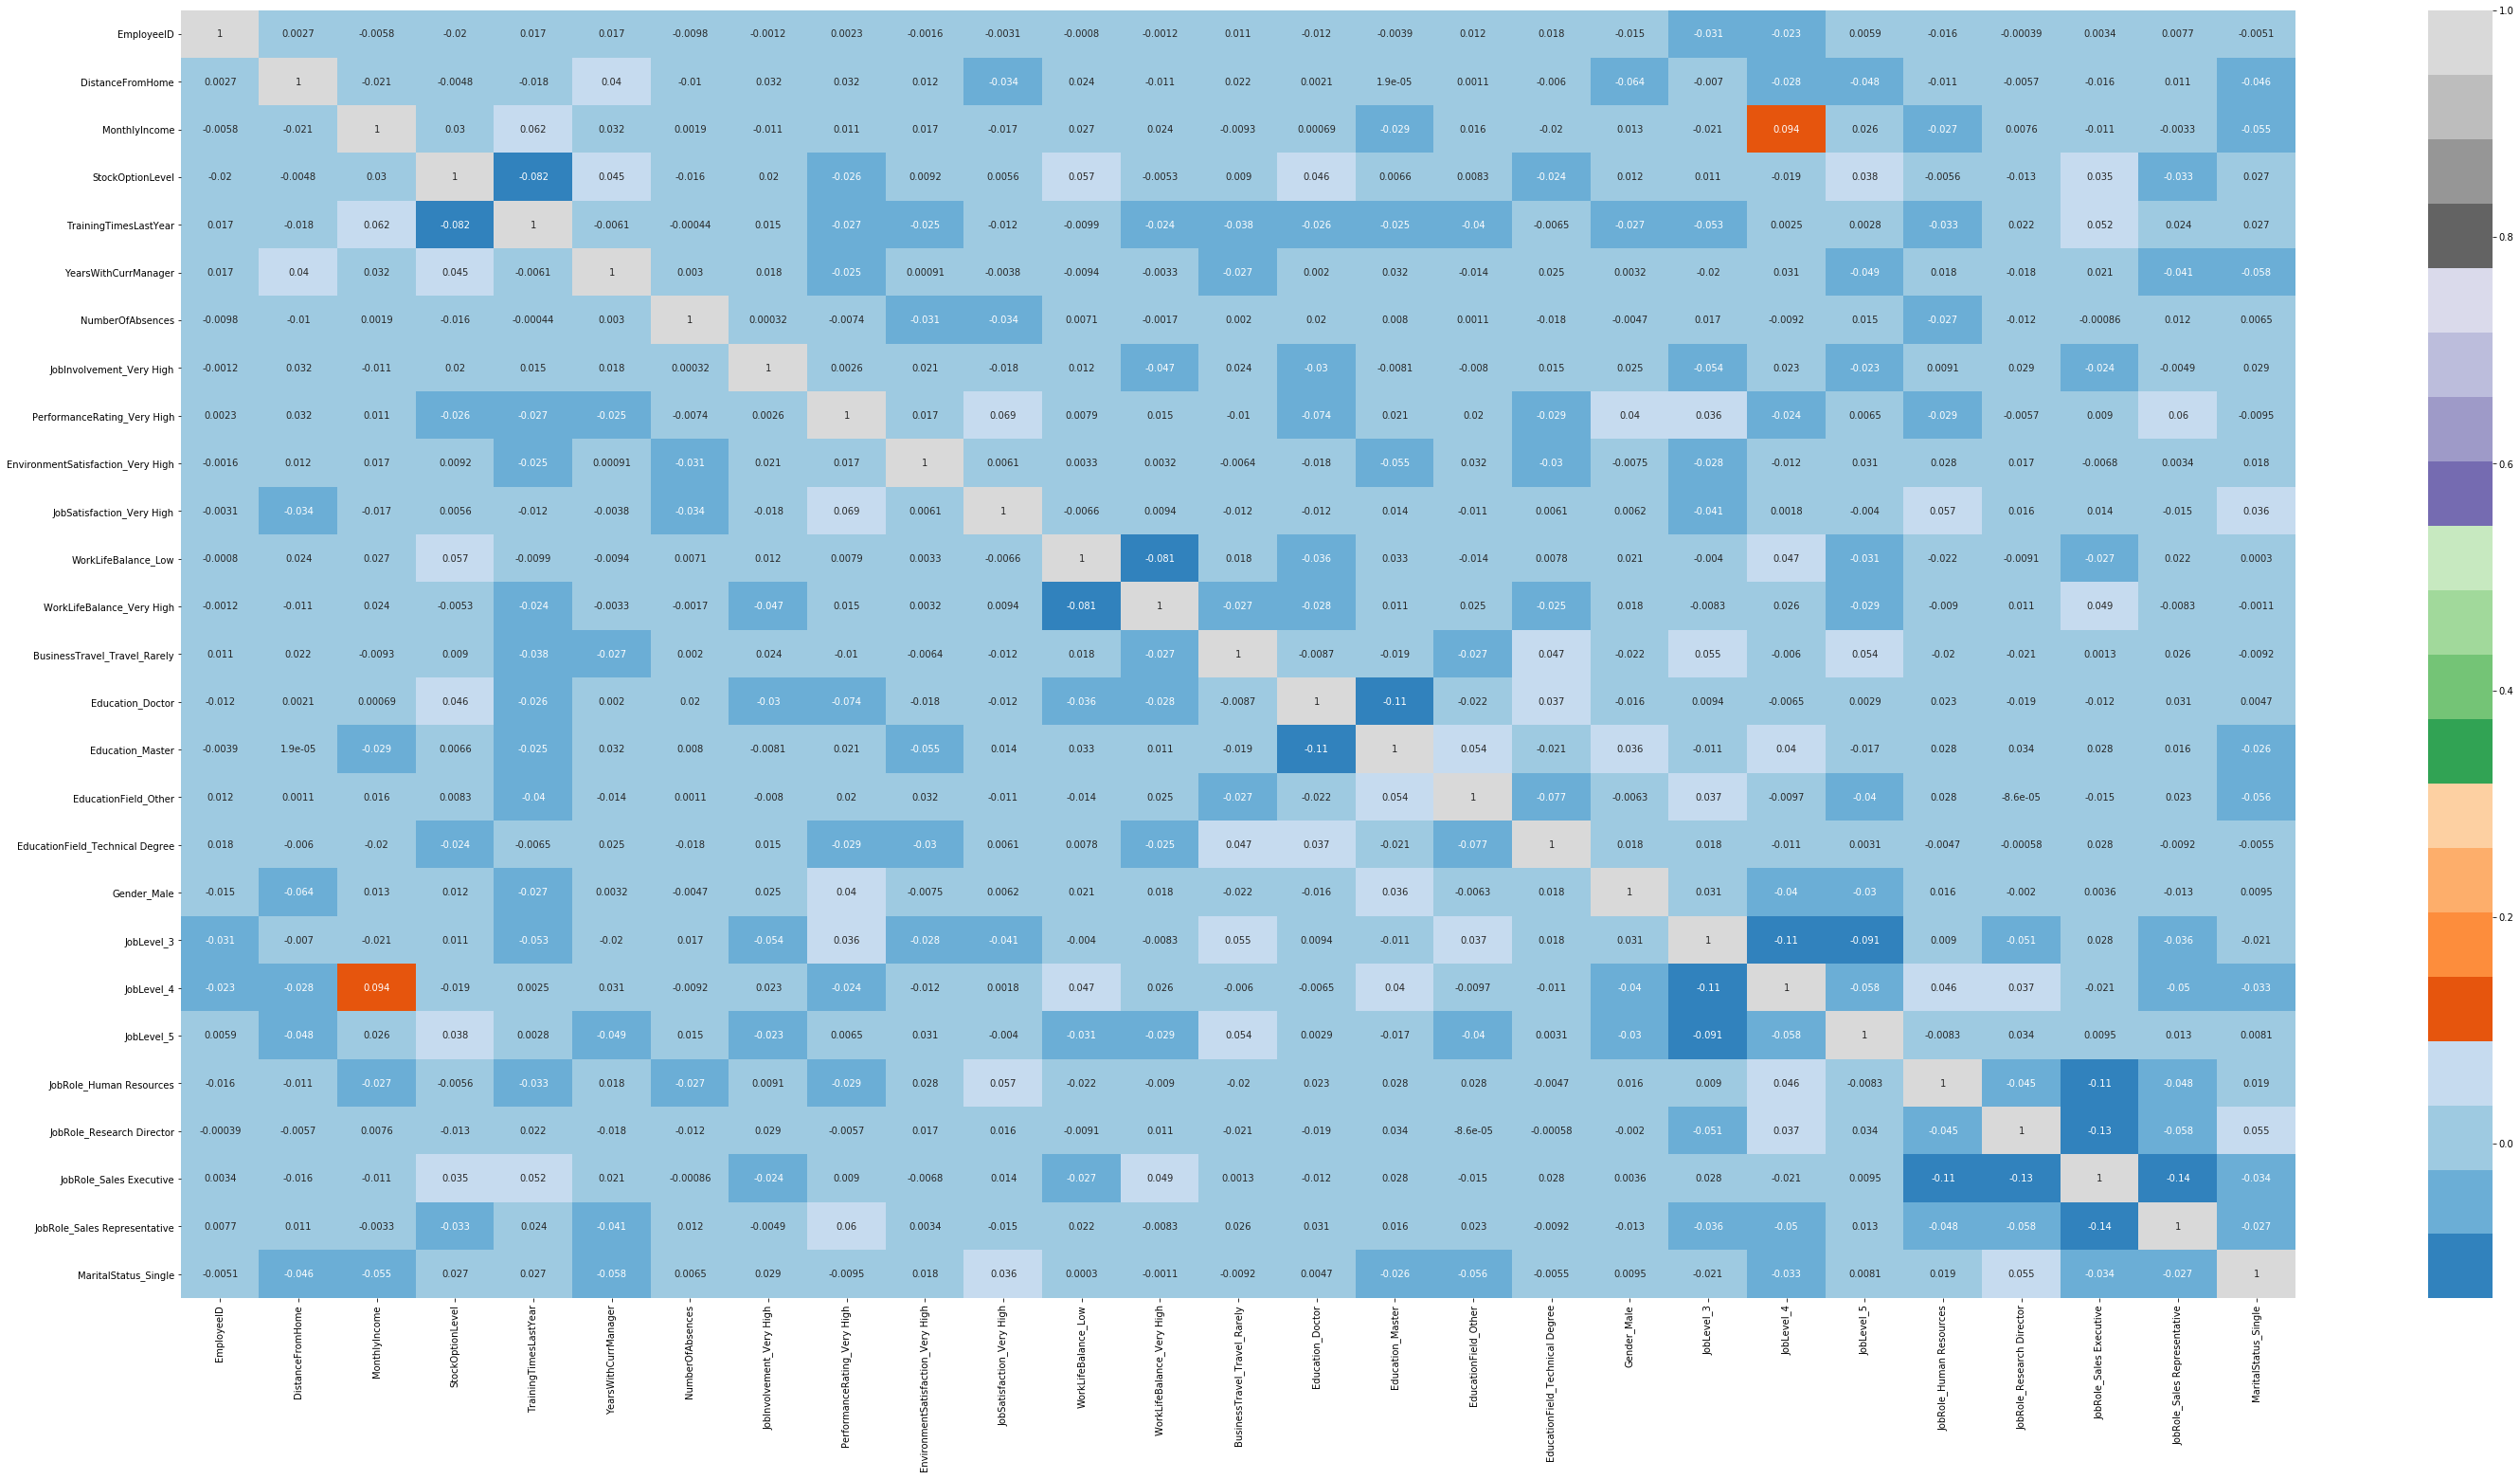

In [107]:
plt.figure(figsize = (50,25))
sns.heatmap(X_train.corr(),annot = True,cmap="tab20c")
plt.show()

# Construction du Model

On commence par séparé le jeu de données en jeu d'entrainement et de test

In [108]:
import statsmodels.api as sm
#Logistic regression model
logrm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logrm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 3087
Model:                            GLM   Df Residuals:                     3059
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1227.4
Date:                Wed, 17 Mar 2021   Deviance:                       2454.8
Time:                        14:02:36   Pearson chi2:                 3.16e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -1.5471      0.206     -7.499      0.000      -1.951      -1.143
EmployeeID                         4.726e-06   4.06e-05      0.116      0.907   -7.48e-05    8.43e-05
DistanceFromHome                      0.0016      0.052      0.031      0.976      -0.101       0.104
MonthlyIncome                        -0.0474      0.054     -0.877      0.380      -0.153       0.059
StockOptionLevel                     -0.1184      0.054     -2.213      0.027      -0.223      -0.014
TrainingTimesLastYear                -0.2160      0.054     -3.974      0.000      -0.323      -0.109
YearsWithCurrManager                 -0.5573      0.062     -9.018      0.000      -0.678      -0.436
NumberOfAbsences                     -0.0263      0.009     -2.808      0.005      -0.045      -0.008
JobInvolvement_Very High              0.1629      0.168      0.968      0.333      -0.167       0.493
PerformanceRating_Very High           0.2544      0.139      1.835      0.066      -0.017       0.526
EnvironmentSatisfaction_Very High    -0.3818      0.117     -3.272      0.001      -0.611      -0.153
JobSatisfaction_Very High            -0.5809      0.121     -4.799      0.000      -0.818      -0.344
WorkLifeBalance_Low                   1.0533      0.194      5.418      0.000       0.672       1.434
WorkLifeBalance_Very High             0.1941      0.161      1.202      0.229      -0.122       0.511
BusinessTravel_Travel_Rarely         -0.2780      0.111     -2.513      0.012      -0.495      -0.061
Education_Doctor                     -0.3071      0.322     -0.954      0.340      -0.938       0.324
Education_Master                     -0.0145      0.119     -0.122      0.903      -0.247       0.218
EducationField_Other                 -0.3614      0.252     -1.433      0.152      -0.856       0.133
EducationField_Technical Degree      -0.3258      0.198     -1.644      0.100      -0.714       0.063
Gender_Male                           0.0455      0.106      0.429      0.668      -0.163       0.254
JobLevel_3                           -0.2775      0.156     -1.775      0.076      -0.584       0.029
JobLevel_4                            0.2375      0.201      1.182      0.237      -0.156       0.631
JobLevel_5                           -0.4843      0.279     -1.736      0.083      -1.031       0.063
JobRole_Human Resources              -0.3000      0.312     -0.960      0.337      -0.912       0.312
JobRole_Research Director             0.4991      0.211      2.370      0.018       0.086       0.912
JobRole_Sales Executive               0.2990      0.124      2.405      0.016       0.055       0.543
JobRole_Sales Representative         -0.2142      0.240     -0.891      0.373      -0.685       0.257
MaritalStatus_Single   

In [110]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 13)             
rfe = rfe.fit(X_train, y_train)

In [112]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('EmployeeID', False, 15),
 ('DistanceFromHome', False, 14),
 ('MonthlyIncome', False, 11),
 ('StockOptionLevel', False, 9),
 ('TrainingTimesLastYear', False, 6),
 ('YearsWithCurrManager', True, 1),
 ('NumberOfAbsences', False, 12),
 ('JobInvolvement_Very High', False, 8),
 ('PerformanceRating_Very High', True, 1),
 ('EnvironmentSatisfaction_Very High', True, 1),
 ('JobSatisfaction_Very High', True, 1),
 ('WorkLifeBalance_Low', True, 1),
 ('WorkLifeBalance_Very High', False, 7),
 ('BusinessTravel_Travel_Rarely', True, 1),
 ('Education_Doctor', True, 1),
 ('Education_Master', False, 13),
 ('EducationField_Other', True, 1),
 ('EducationField_Technical Degree', True, 1),
 ('Gender_Male', False, 10),
 ('JobLevel_3', False, 2),
 ('JobLevel_4', False, 4),
 ('JobLevel_5', True, 1),
 ('JobRole_Human Resources', False, 5),
 ('JobRole_Research Director', True, 1),
 ('JobRole_Sales Executive', True, 1),
 ('JobRole_Sales Representative', False, 3),
 ('MaritalStatus_Single', True, 1)]

In [113]:
col = X_train.columns[rfe.support_]
col

Index(['YearsWithCurrManager', 'PerformanceRating_Very High',
       'EnvironmentSatisfaction_Very High', 'JobSatisfaction_Very High',
       'WorkLifeBalance_Low', 'BusinessTravel_Travel_Rarely',
       'Education_Doctor', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobLevel_5',
       'JobRole_Research Director', 'JobRole_Sales Executive',
       'MaritalStatus_Single'],
      dtype='object')

In [114]:
X_train.columns[~rfe.support_]

Index(['EmployeeID', 'DistanceFromHome', 'MonthlyIncome', 'StockOptionLevel',
       'TrainingTimesLastYear', 'NumberOfAbsences', 'JobInvolvement_Very High',
       'WorkLifeBalance_Very High', 'Education_Master', 'Gender_Male',
       'JobLevel_3', 'JobLevel_4', 'JobRole_Human Resources',
       'JobRole_Sales Representative'],
      dtype='object')

In [115]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 3087
Model:                            GLM   Df Residuals:                     3073
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1245.6
Date:                Wed, 17 Mar 2021   Deviance:                       2491.2
Time:                        14:10:52   Pearson chi2:                 3.17e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -1.8334      0.120    -15.277      0.000      -2.069      -1.598
YearsWithCurrManager                 -0.5432      0.061     -8.901      0.000      -0.663      -0.424
PerformanceRating_Very High           0.2639      0.137      1.926      0.054      -0.005       0.532
EnvironmentSatisfaction_Very High    -0.3479      0.115     -3.018      0.003      -0.574      -0.122
JobSatisfaction_Very High            -0.5426      0.119     -4.548      0.000      -0.776      -0.309
WorkLifeBalance_Low                   0.9960      0.190      5.245      0.000       0.624       1.368
BusinessTravel_Travel_Rarely         -0.2753      0.109     -2.521      0.012      -0.489      -0.061
Education_Doctor                     -0.3046      0.315     -0.966      0.334      -0.922       0.313
EducationField_Other                 -0.3612      0.249     -1.451      0.147      -0.849       0.127
EducationField_Technical Degree      -0.2967      0.196     -1.512      0.131      -0.681       0.088
JobLevel_5                           -0.4927      0.275     -1.794      0.073      -1.031       0.046
JobRole_Research Director             0.5299      0.206      2.567      0.010       0.125       0.934
JobRole_Sales Executive               0.2758      0.120      2.293      0.022       0.040       0.512
MaritalStatus_Single                  1.0746      0.103     10.425      0.000       0.873       1.277
=====================================================================================================
"""

In [117]:
#Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

537     0.138336
1881    0.243224
2367    0.072743
3619    0.143903
1398    0.065478
706     0.211106
3559    0.080260
3461    0.092673
3469    0.103362
2170    0.058073
dtype: float64

In [118]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.13833597, 0.24322351, 0.07274308, 0.14390251, 0.06547849,
       0.21110602, 0.08026004, 0.09267312, 0.10336191, 0.0580733 ])

In [119]:
y_train_pred_final = pd.DataFrame({'Attrition':y_train.values, 'Attrition_Prob':y_train_pred})
y_train_pred_final['EmployeeID'] = y_train.index
y_train_pred_final.head()

Attrition  Attrition_Prob  EmployeeID
0          0        0.138336         537
1          1        0.243224        1881
2          0        0.072743        2367
3          0        0.143903        3619
4          0        0.065478        1398

In [120]:
y_train_pred_final['predicted'] = y_train_pred_final.Attrition_Prob.map(lambda x: 1 if x > 0.5 else 0)
#Let's see the head
y_train_pred_final.head()

Attrition  Attrition_Prob  EmployeeID  predicted
0          0        0.138336         537          0
1          1        0.243224        1881          0
2          0        0.072743        2367          0
3          0        0.143903        3619          0
4          0        0.065478        1398          0

In [121]:
from sklearn import metrics
#Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Attrition, y_train_pred_final.predicted )
print(confusion)

[[2555   19]
 [ 492   21]]


In [122]:
#Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Attrition, y_train_pred_final.predicted))

0.8344671201814059


# Variance Inflation Factor (VIF)

In [123]:
#Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5        BusinessTravel_Travel_Rarely  1.92
12               MaritalStatus_Single  1.36
2   EnvironmentSatisfaction_Very High  1.34
3           JobSatisfaction_Very High  1.34
11            JobRole_Sales Executive  1.24
1         PerformanceRating_Very High  1.16
8     EducationField_Technical Degree  1.10
9                          JobLevel_5  1.06
10          JobRole_Research Director  1.06
4                 WorkLifeBalance_Low  1.05
7                EducationField_Other  1.05
6                    Education_Doctor  1.03
0                YearsWithCurrManager  1.01

#

In [124]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [125]:
#Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.04093567251461988

In [126]:
#Let us calculate specificity
TN / float(TN+FP)

0.9926184926184927

In [128]:
#Calculate false postive rate - 
print(FP/ float(TN+FP))

0.007381507381507382


In [130]:
#positive predictive value 
print (TP / float(TP+FP))

0.525


In [131]:
#Negative predictive value
print (TN / float(TN+ FN))

0.8385297013455858


# ROC

In [132]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [133]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Attrition, y_train_pred_final.Attrition_Prob, drop_intermediate = False )

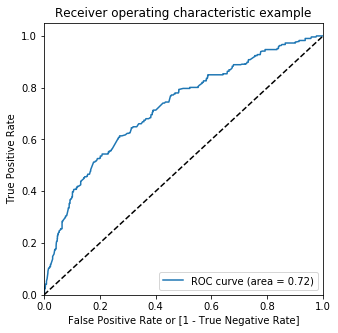

In [134]:
draw_roc(y_train_pred_final.Attrition, y_train_pred_final.Attrition_Prob)

# Optimal Cutoff Point

In [135]:
#Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Attrition_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Attrition  Attrition_Prob  EmployeeID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.138336         537          0    1    1    0    0    0   
1          1        0.243224        1881          0    1    1    1    0    0   
2          0        0.072743        2367          0    1    0    0    0    0   
3          0        0.143903        3619          0    1    1    0    0    0   
4          0        0.065478        1398          0    1    0    0    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    0    0    0    0    0  
4    0    0    0    0    0

In [136]:
#Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

#TP = confusion[1,1] # true positive 
#TN = confusion[0,0] # true negatives
#FP = confusion[0,1] # false positives
#FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Attrition, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.166181  1.000000  0.000000
0.1   0.1  0.453191  0.849903  0.374126
0.2   0.2  0.731454  0.551657  0.767288
0.3   0.3  0.815679  0.370370  0.904429
0.4   0.4  0.831228  0.138402  0.969308
0.5   0.5  0.834467  0.040936  0.992618
0.6   0.6  0.836087  0.021442  0.998446
0.7   0.7  0.834143  0.005848  0.999223
0.8   0.8  0.833819  0.000000  1.000000
0.9   0.9  0.833819  0.000000  1.000000


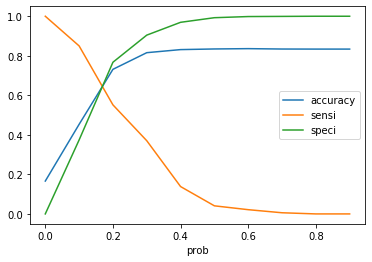

In [137]:
#Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [138]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Attrition_Prob.map( lambda x: 1 if x > 0.2 else 0)
y_train_pred_final.head()

Attrition  Attrition_Prob  EmployeeID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.138336         537          0    1    1    0    0    0   
1          1        0.243224        1881          0    1    1    1    0    0   
2          0        0.072743        2367          0    1    0    0    0    0   
3          0        0.143903        3619          0    1    1    0    0    0   
4          0        0.065478        1398          0    1    0    0    0    0   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                0  
1    0    0    0    0    0                1  
2    0    0    0    0    0                0  
3    0    0    0    0    0                0  
4    0    0    0    0    0                0

In [139]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Attrition, y_train_pred_final.final_predicted)

0.7314544865565273

In [140]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Attrition, y_train_pred_final.final_predicted )
confusion2

array([[1975,  599],
       [ 230,  283]], dtype=int64)

In [141]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [142]:
#Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5516569200779727

In [143]:
#Let us calculate specificity
TN / float(TN+FP)

0.7672882672882673

In [144]:
#Calculate false postive rate - predicting Attrition when customer does not have Attrited
print(FP/ float(TN+FP))

0.2327117327117327


In [145]:
#Positive predictive value 
print (TP / float(TP+FP))

0.32086167800453513


In [146]:
#Negative predictive value
print (TN / float(TN+ FN))

0.8956916099773242
